## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from pygam import LinearGAM
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import shap

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.options.display.float_format = '{:20,.4f}'.format

In [3]:
life_exp_df = pd.read_csv('D://Projects & Datasets//Life_expectancy//dataset//Life Expectancy Data.csv')

In [4]:
life_exp_df.shape

(2938, 22)

In [5]:
life_exp_df.head()

Country  Year      Status     Life expectancy       Adult Mortality  \
0  Afghanistan  2015  Developing              65.0000             263.0000   
1  Afghanistan  2014  Developing              59.9000             271.0000   
2  Afghanistan  2013  Developing              59.9000             268.0000   
3  Afghanistan  2012  Developing              59.5000             272.0000   
4  Afghanistan  2011  Developing              59.2000             275.0000   

   infant deaths              Alcohol  percentage expenditure  \
0             62               0.0100                 71.2796   
1             64               0.0100                 73.5236   
2             66               0.0100                 73.2192   
3             69               0.0100                 78.1842   
4             71               0.0100                  7.0971   

           Hepatitis B  Measles                  BMI   under-five deaths   \
0              65.0000      1154              19.1000                  83   
1              62.0000       492              18.6000                  86   
2              64.0000       430              18.1000                  89   
3              67.0000      2787              17.6000                  93   
4              68.0000      3013              17.2000                  97   

                 Polio    Total expenditure          Diphtheria   \
0               6.0000               8.1600              65.0000   
1              58.0000               8.1800              62.0000   
2              62.0000               8.1300              64.0000   
3              67.0000               8.5200              67.0000   
4              68.0000               7.8700              68.0000   

              HIV/AIDS                  GDP           Population  \
0               0.1000             584.2592      33,736,494.0000   
1               0.1000             612.6965         327,582.0000   
2               0.1000             631.7450      31,731,688.0000   
3               0.1000             669.9590       3,696,958.0000   
4               0.1000              63.5372       2,978,599.0000   

    thinness  1-19 years   thinness 5-9 years  \
0                17.2000              17.3000   
1                17.5000              17.5000   
2                17.7000              17.7000   
3                17.9000              18.0000   
4                18.2000              18.2000   

   Income composition of resources            Schooling  
0                           0.4790              10.1000  
1                           0.4760              10.0000  
2                           0.4700               9.9000  
3                           0.4630               9.8000  
4                           0.4540               9.5000

In [6]:
life_exp_df.describe()

Year     Life expectancy       Adult Mortality  \
count           2,938.0000           2,928.0000           2,928.0000   
mean            2,007.5187              69.2249             164.7964   
std                 4.6138               9.5239             124.2921   
min             2,000.0000              36.3000               1.0000   
25%             2,004.0000              63.1000              74.0000   
50%             2,008.0000              72.1000             144.0000   
75%             2,012.0000              75.7000             228.0000   
max             2,015.0000              89.0000             723.0000   

             infant deaths              Alcohol  percentage expenditure  \
count           2,938.0000           2,744.0000              2,938.0000   
mean               30.3039               4.6029                738.2513   
std               117.9265               4.0524              1,987.9149   
min                 0.0000               0.0100                  0.0000   
25%                 0.0000               0.8775                  4.6853   
50%                 3.0000               3.7550                 64.9129   
75%                22.0000               7.7025                441.5341   
max             1,800.0000              17.8700             19,479.9116   

               Hepatitis B             Measles                  BMI   \
count           2,385.0000           2,938.0000           2,904.0000   
mean               80.9405           2,419.5922              38.3212   
std                25.0700          11,467.2725              20.0440   
min                 1.0000               0.0000               1.0000   
25%                77.0000               0.0000              19.3000   
50%                92.0000              17.0000              43.5000   
75%                97.0000             360.2500              56.2000   
max                99.0000         212,183.0000              87.3000   

        under-five deaths                 Polio    Total expenditure  \
count           2,938.0000           2,919.0000           2,712.0000   
mean               42.0357              82.5502               5.9382   
std               160.4455              23.4280               2.4983   
min                 0.0000               3.0000               0.3700   
25%                 0.0000              78.0000               4.2600   
50%                 4.0000              93.0000               5.7550   
75%                28.0000              97.0000               7.4925   
max             2,500.0000              99.0000              17.6000   

               Diphtheria              HIV/AIDS                  GDP  \
count           2,919.0000           2,938.0000           2,490.0000   
mean               82.3241               1.7421           7,483.1585   
std                23.7169               5.0778          14,270.1693   
min                 2.0000               0.1000               1.6813   
25%                78.0000               0.1000             463.9356   
50%                93.0000               0.1000           1,766.9476   
75%                97.0000               0.8000           5,910.8063   
max                99.0000              50.6000         119,172.7418   

                Population   thinness  1-19 years   thinness 5-9 years  \
count           2,286.0000             2,904.0000           2,904.0000   
mean       12,753,375.1201                 4.8397               4.8703   
std        61,012,096.5084                 4.4202               4.5089   
min                34.0000                 0.1000               0.1000   
25%           195,793.2500                 1.6000               1.5000   
50%         1,386,542.0000                 3.3000               3.3000   
75%         7,420,359.0000                 7.2000               7.2000   
max     1,293,859,294.0000                27.7000              28.6000   

       Income composition of resources            Schooling  
count                

In [7]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
life_exp_df['Life expectancy ']

0                   65.0000
1                   59.9000
2                   59.9000
3                   59.5000
4                   59.2000
               ...         
2933                44.3000
2934                44.5000
2935                44.8000
2936                45.3000
2937                46.0000
Name: Life expectancy , Length: 2938, dtype: float64

In [9]:
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
for i in life_exp_df.columns:
    print('Column_name: ',i)
    print('Column_type: ',life_exp_df[i].dtype)    
    print('Total_values: ',life_exp_df[i].count())
    print('Unique_value_counts: ',life_exp_df[i].nunique())
    print('Null_values: ',life_exp_df[i].isnull().sum())
    print('\n')

Column_name:  Country
Column_type:  object
Total_values:  2938
Unique_value_counts:  193
Null_values:  0


Column_name:  Year
Column_type:  int64
Total_values:  2938
Unique_value_counts:  16
Null_values:  0


Column_name:  Status
Column_type:  object
Total_values:  2938
Unique_value_counts:  2
Null_values:  0


Column_name:  Life expectancy 
Column_type:  float64
Total_values:  2928
Unique_value_counts:  362
Null_values:  10


Column_name:  Adult Mortality
Column_type:  float64
Total_values:  2928
Unique_value_counts:  425
Null_values:  10


Column_name:  infant deaths
Column_type:  int64
Total_values:  2938
Unique_value_counts:  209
Null_values:  0


Column_name:  Alcohol
Column_type:  float64
Total_values:  2744
Unique_value_counts:  1076
Null_values:  194


Column_name:  percentage expenditure
Column_type:  float64
Total_values:  2938
Unique_value_counts:  2328
Null_values:  0


Column_name:  Hepatitis B
Column_type:  float64
Total_values:  2385
Unique_value_counts:  87
Null_values:

## EDA And Data Visualization

In [14]:
life_exp_df.head(7)

Country  Year      Status     Life expectancy       Adult Mortality  \
0  Afghanistan  2015  Developing              65.0000             263.0000   
1  Afghanistan  2014  Developing              59.9000             271.0000   
2  Afghanistan  2013  Developing              59.9000             268.0000   
3  Afghanistan  2012  Developing              59.5000             272.0000   
4  Afghanistan  2011  Developing              59.2000             275.0000   
5  Afghanistan  2010  Developing              58.8000             279.0000   
6  Afghanistan  2009  Developing              58.6000             281.0000   

   infant deaths              Alcohol  percentage expenditure  \
0             62               0.0100                 71.2796   
1             64               0.0100                 73.5236   
2             66               0.0100                 73.2192   
3             69               0.0100                 78.1842   
4             71               0.0100                  7.0971   
5             74               0.0100                 79.6794   
6             77               0.0100                 56.7622   

           Hepatitis B  Measles                  BMI   under-five deaths   \
0              65.0000      1154              19.1000                  83   
1              62.0000       492              18.6000                  86   
2              64.0000       430              18.1000                  89   
3              67.0000      2787              17.6000                  93   
4              68.0000      3013              17.2000                  97   
5              66.0000      1989              16.7000                 102   
6              63.0000      2861              16.2000                 106   

                 Polio    Total expenditure          Diphtheria   \
0               6.0000               8.1600              65.0000   
1              58.0000               8.1800              62.0000   
2              62.0000               8.1300              64.0000   
3              67.0000               8.5200              67.0000   
4              68.0000               7.8700              68.0000   
5              66.0000               9.2000              66.0000   
6              63.0000               9.4200              63.0000   

              HIV/AIDS                  GDP           Population  \
0               0.1000             584.2592      33,736,494.0000   
1               0.1000             612.6965         327,582.0000   
2               0.1000             631.7450      31,731,688.0000   
3               0.1000             669.9590       3,696,958.0000   
4               0.1000              63.5372       2,978,599.0000   
5               0.1000             553.3289       2,883,167.0000   
6               0.1000             445.8933         284,331.0000   

    thinness  1-19 years   thinness 5-9 years  \
0                17.2000              17.3000   
1                17.5000              17.5000   
2                17.7000              17.7000   
3                17.9000              18.0000   
4                18.2000              18.2000   
5                18.4000              18.4000   
6                18.6000              18.7000   

   Income composition of resources            Schooling  
0                           0.4790              10.1000  
1                           0.4760              10.0000  
2                           0.4700               9.9000  
3                           0.4630               9.8000  
4                           0.4540               9.5000  
5                           0.4480               9.2000  
6                           0.4340               8.9000

In [15]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
# List of numerical and categorical columns

numeric_cols = ['Year','Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling' ]

cat_cols = ['Country','Status']

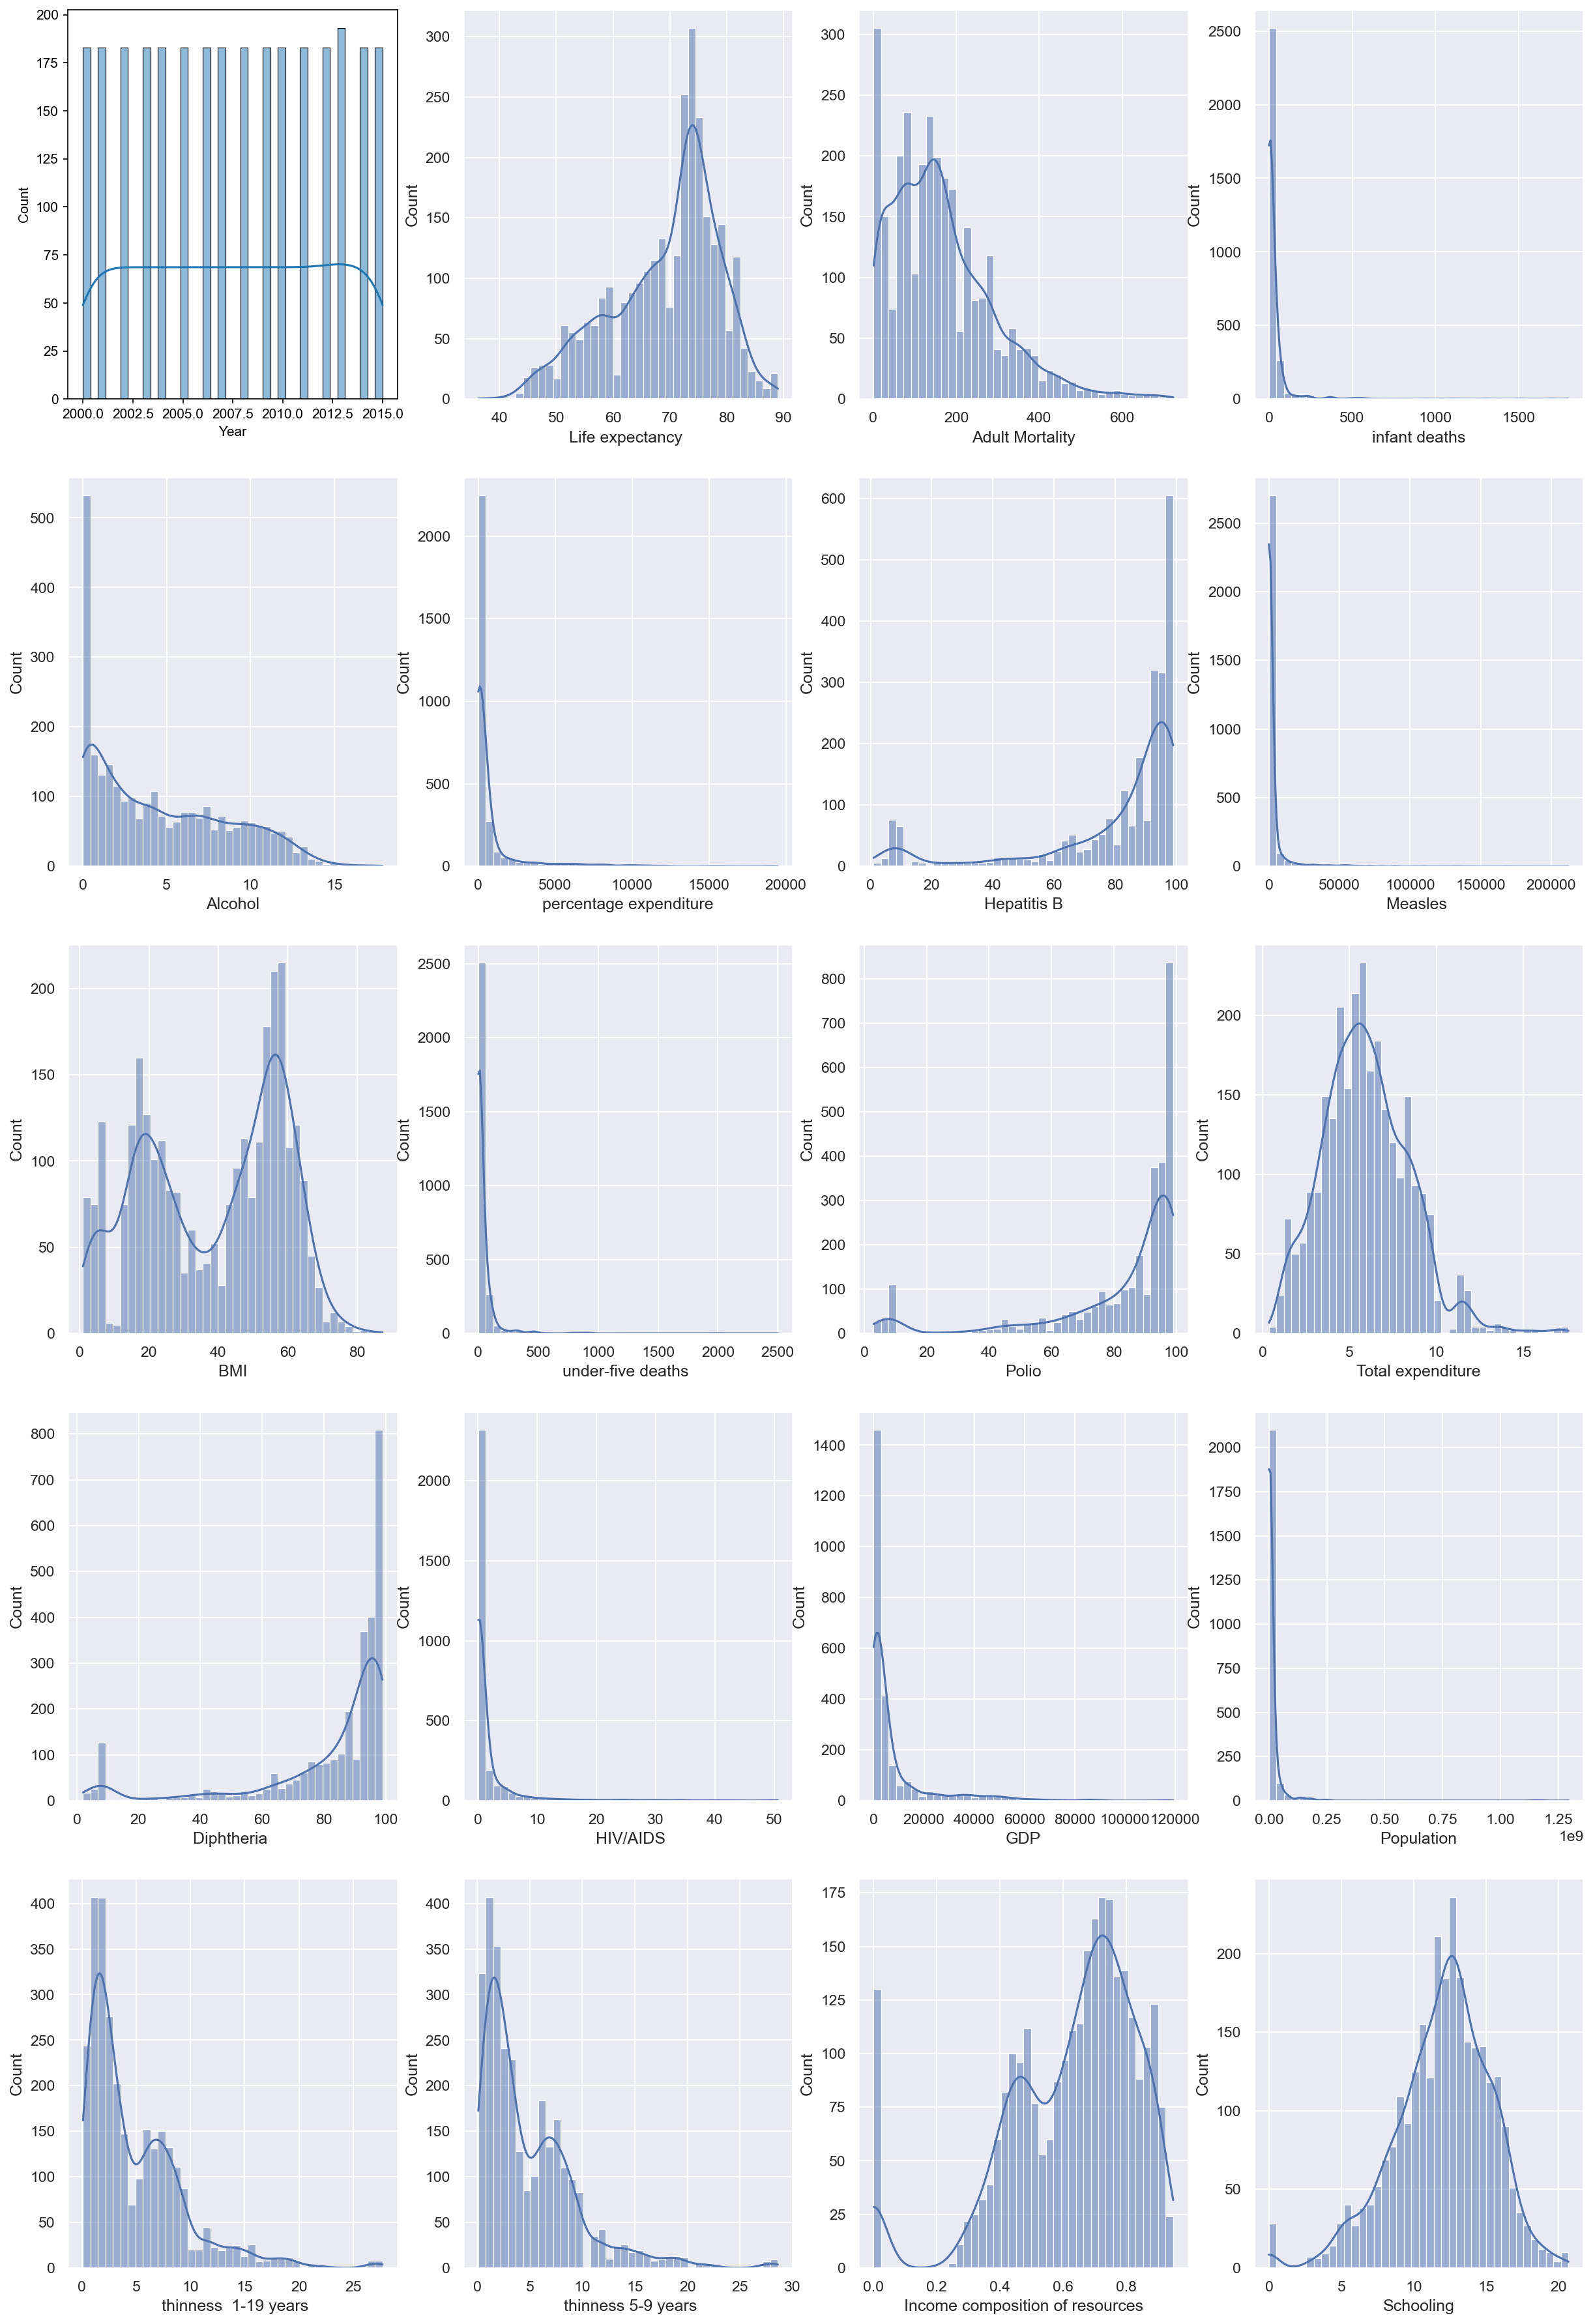

In [17]:
# Histogram plot for each numerical variable 

plt.figure(figsize=(20,30),dpi=150 )
for i,col in enumerate(numeric_cols,start=1):
    plt.subplot(5,4,i)
    sns.histplot(life_exp_df[col],kde=True, bins=40)
    sns.set(style='darkgrid')
plt.show()


<Axes: xlabel='Year', ylabel='Life expectancy '>

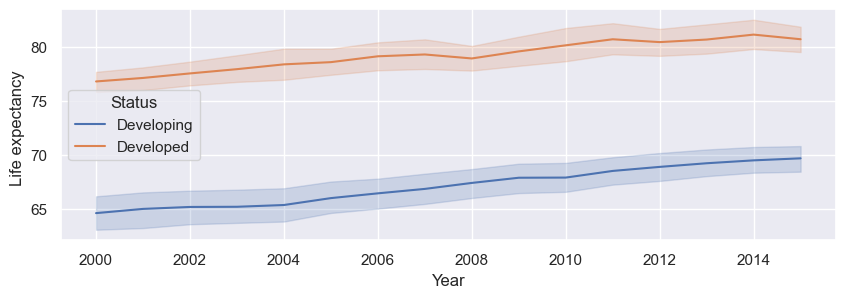

In [18]:
#trend of life expectancy over the years for Developing vs Developed countries
plt.figure(figsize = (10,3))
sns.lineplot(life_exp_df,x = 'Year', y = 'Life expectancy ',hue = 'Status')


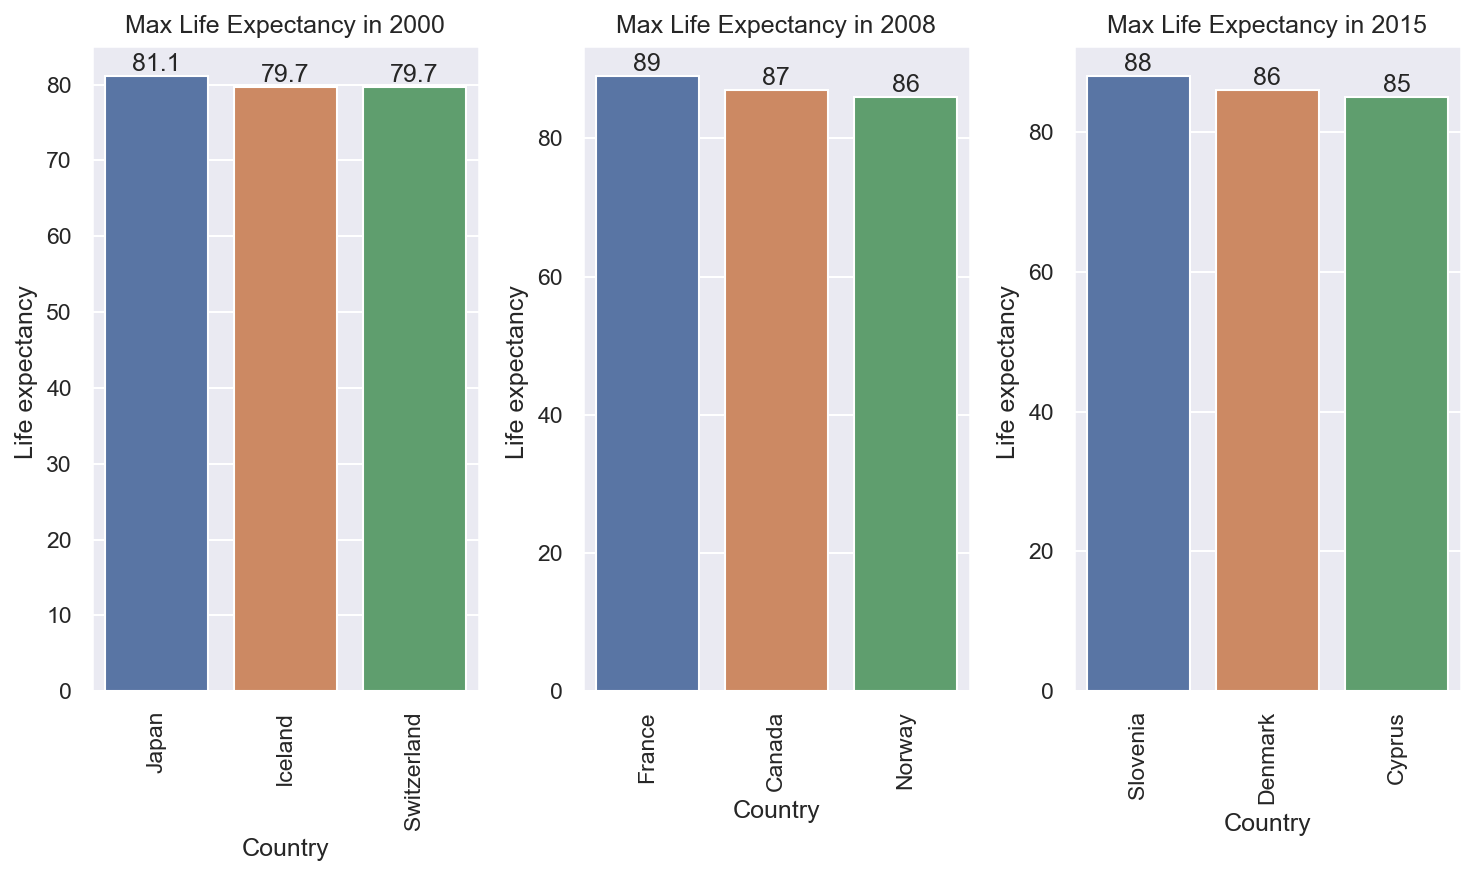

In [19]:
#Comparison of countries with highest Life Expectancy in 2000,2008,2015

top_10_le_00 = life_exp_df[life_exp_df['Year'] == 2000].groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).to_frame().head(3).reset_index()
top_10_le_08 = life_exp_df[life_exp_df['Year'] == 2008].groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).to_frame().head(3).reset_index()
top_10_le_15 = life_exp_df[life_exp_df['Year'] == 2015].groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).to_frame().head(3).reset_index()

plt.figure(figsize=(10,6),dpi=150)

plt.subplot(1,3,1)
ax1 = sns.barplot(data=top_10_le_00,x='Country',y='Life expectancy ')
plt.xticks(rotation=90)
plt.title('Max Life Expectancy in 2000')
for i in ax1.containers:
    ax1.bar_label(i,)
    
plt.subplot(1,3,2)
ax2 = sns.barplot(data=top_10_le_08,x='Country',y='Life expectancy ',)
plt.xticks(rotation=90)
plt.title('Max Life Expectancy in 2008')
for i in ax2.containers:
    ax2.bar_label(i,)

plt.subplot(1,3,3)
ax3 = sns.barplot(data=top_10_le_15,x='Country',y='Life expectancy ',)
plt.xticks(rotation=90)
plt.title('Max Life Expectancy in 2015')
for i in ax3.containers:
    ax3.bar_label(i,)

plt.tight_layout()

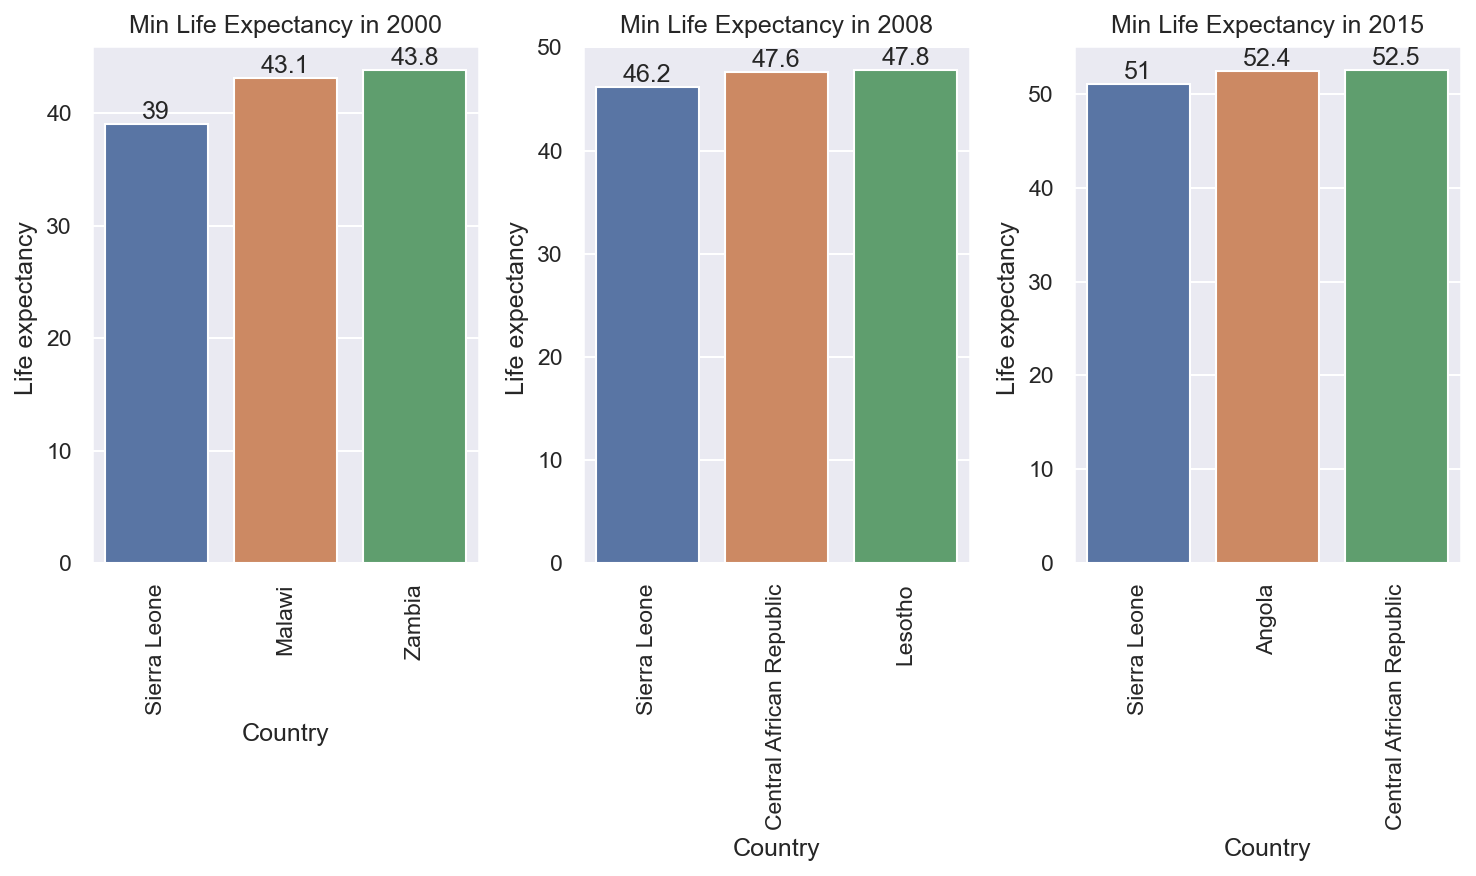

In [20]:
#Comparison of countries with lowest Life Expectancy in 2000,2008,2015

bot_10_le_00 = life_exp_df[life_exp_df['Year'] == 2000].groupby('Country')['Life expectancy '].mean().sort_values(ascending=True).to_frame().head(3).reset_index()
bot_10_le_08 = life_exp_df[life_exp_df['Year'] == 2008].groupby('Country')['Life expectancy '].mean().sort_values(ascending=True).to_frame().head(3).reset_index()
bot_10_le_15 = life_exp_df[life_exp_df['Year'] == 2015].groupby('Country')['Life expectancy '].mean().sort_values(ascending=True).to_frame().head(3).reset_index()

plt.figure(figsize=(10,6),dpi=150)

plt.subplot(1,3,1)
ax1 = sns.barplot(data=bot_10_le_00,x='Country',y='Life expectancy ')
plt.xticks(rotation=90)
plt.title('Min Life Expectancy in 2000')
for i in ax1.containers:
    ax1.bar_label(i,)
    
plt.subplot(1,3,2)
ax2 = sns.barplot(data=bot_10_le_08,x='Country',y='Life expectancy ',)
plt.xticks(rotation=90)
plt.title('Min Life Expectancy in 2008')
for i in ax2.containers:
    ax2.bar_label(i,)

plt.subplot(1,3,3)
ax3 = sns.barplot(data=bot_10_le_15,x='Country',y='Life expectancy ',)
plt.xticks(rotation=90)
plt.title('Min Life Expectancy in 2015')
for i in ax3.containers:
    ax3.bar_label(i,)

plt.tight_layout()

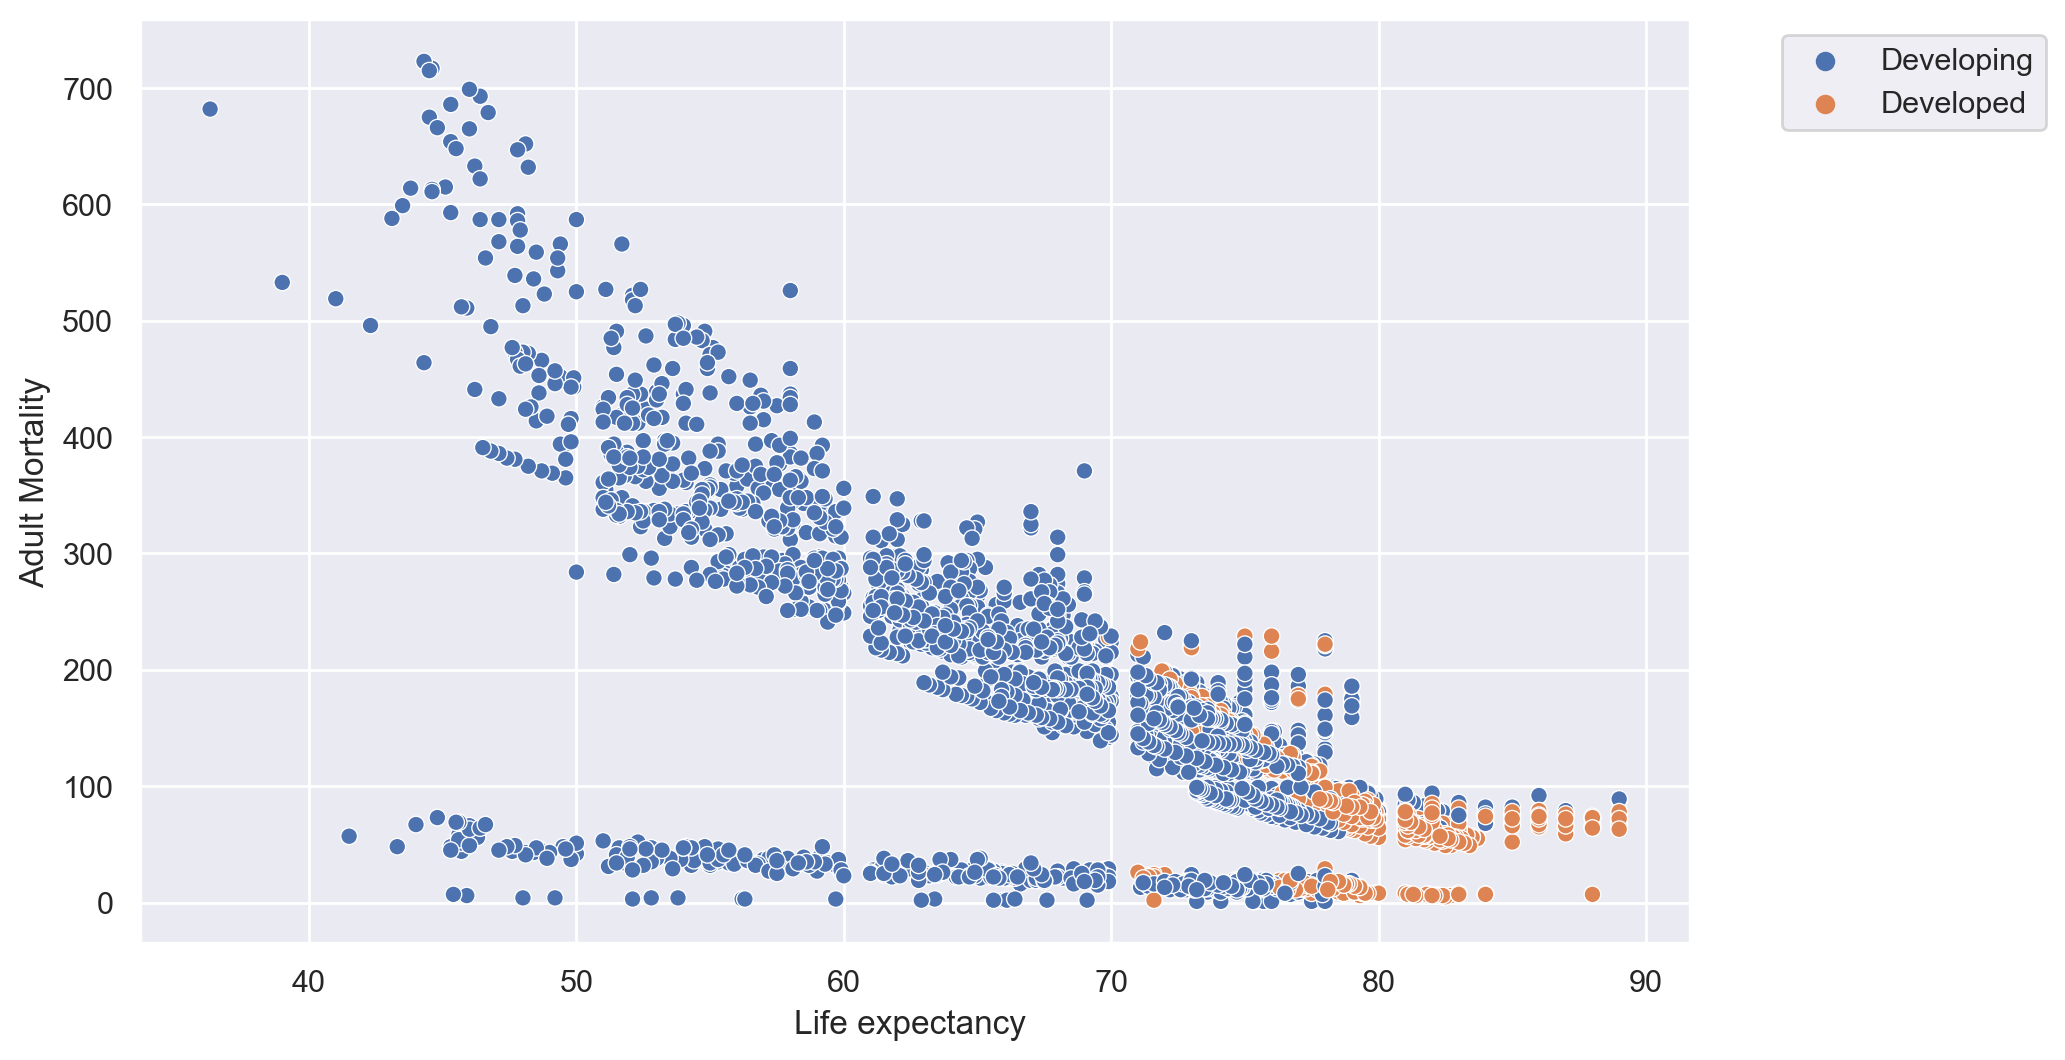

In [21]:
# scatterplot of life expectancy and adult mortality wrt Country Status

plt.figure(figsize=(10,6),dpi = 200)
sns.scatterplot(data=life_exp_df,x='Life expectancy ',y= 'Adult Mortality', hue='Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

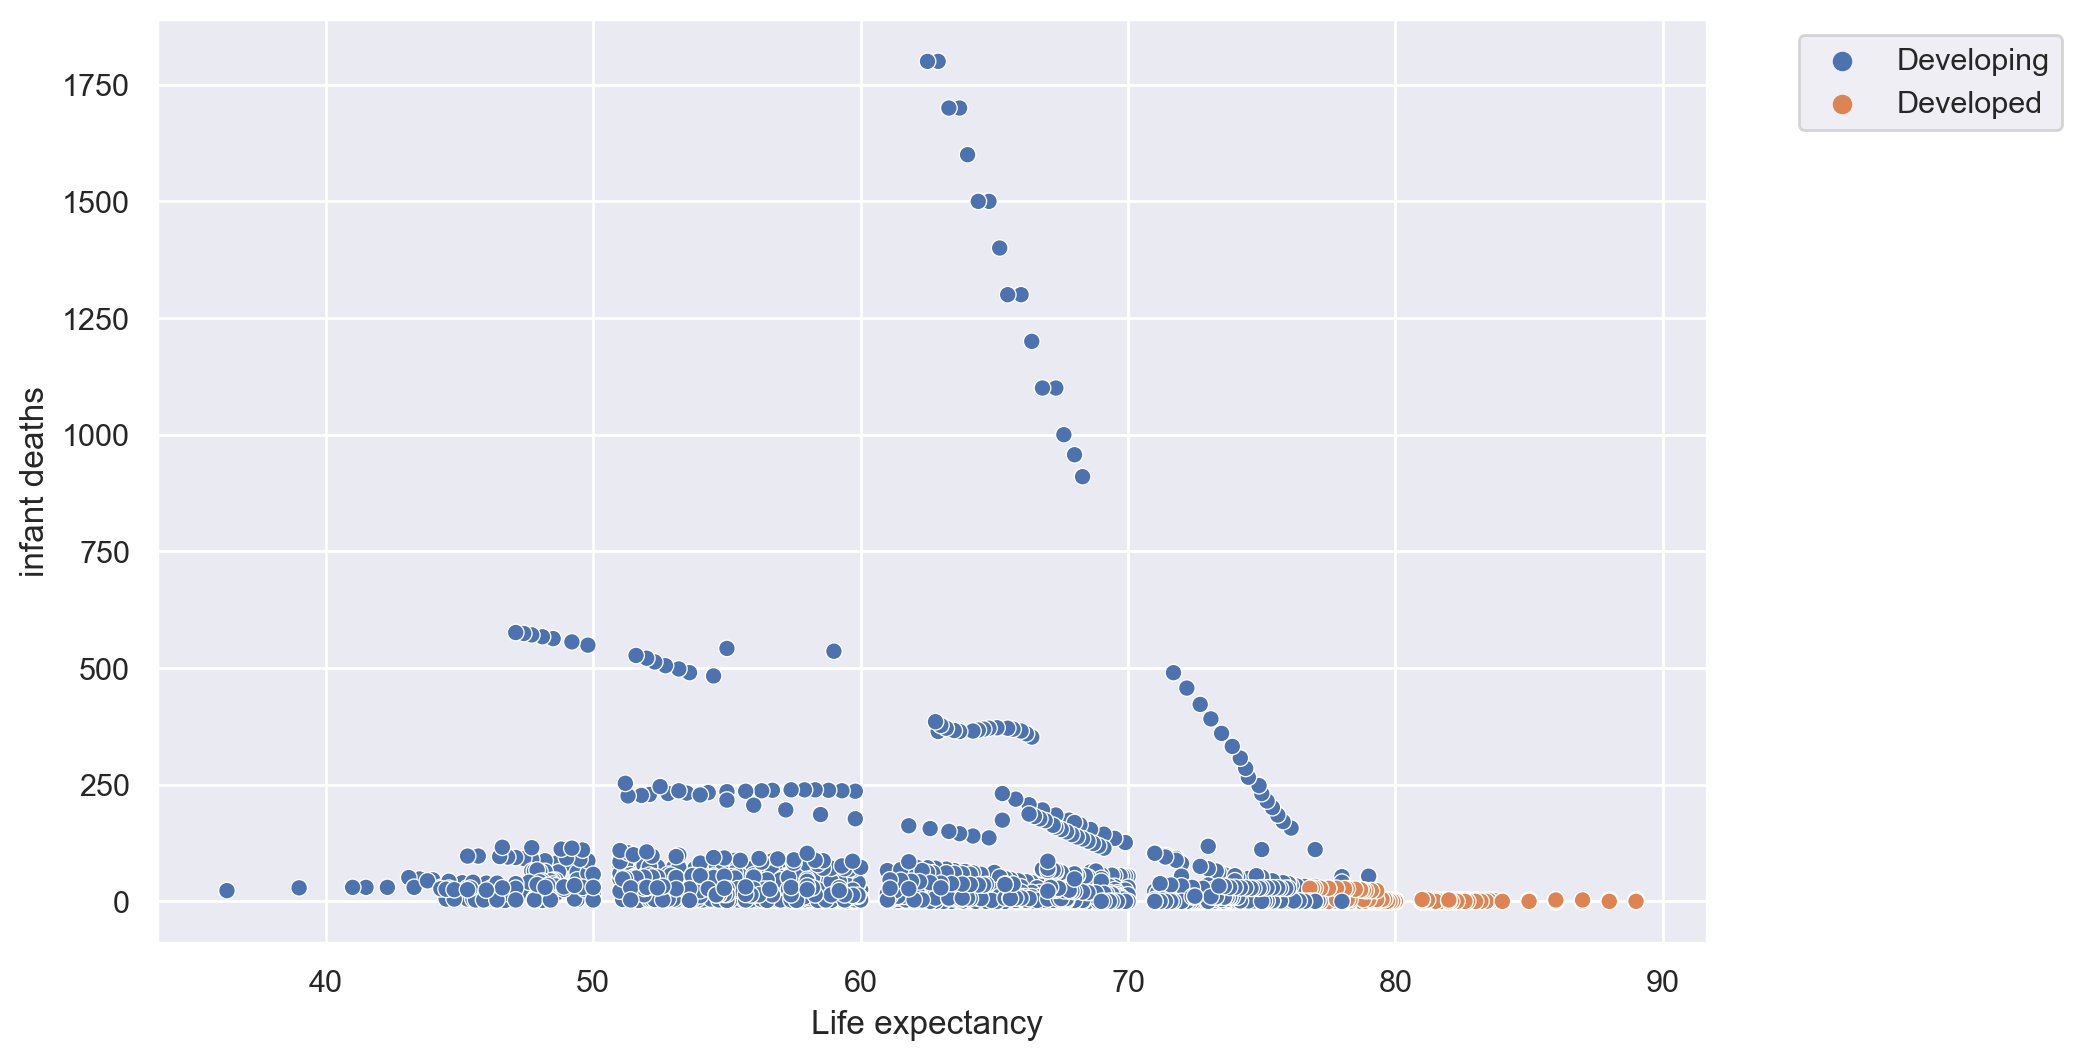

In [22]:
# scatterplot of life expectancy and infant deaths wrt Country Status

plt.figure(figsize=(10,6),dpi = 200)
sns.scatterplot(data=life_exp_df,x='Life expectancy ',y= 'infant deaths', hue='Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

<Figure size 800x400 with 0 Axes>

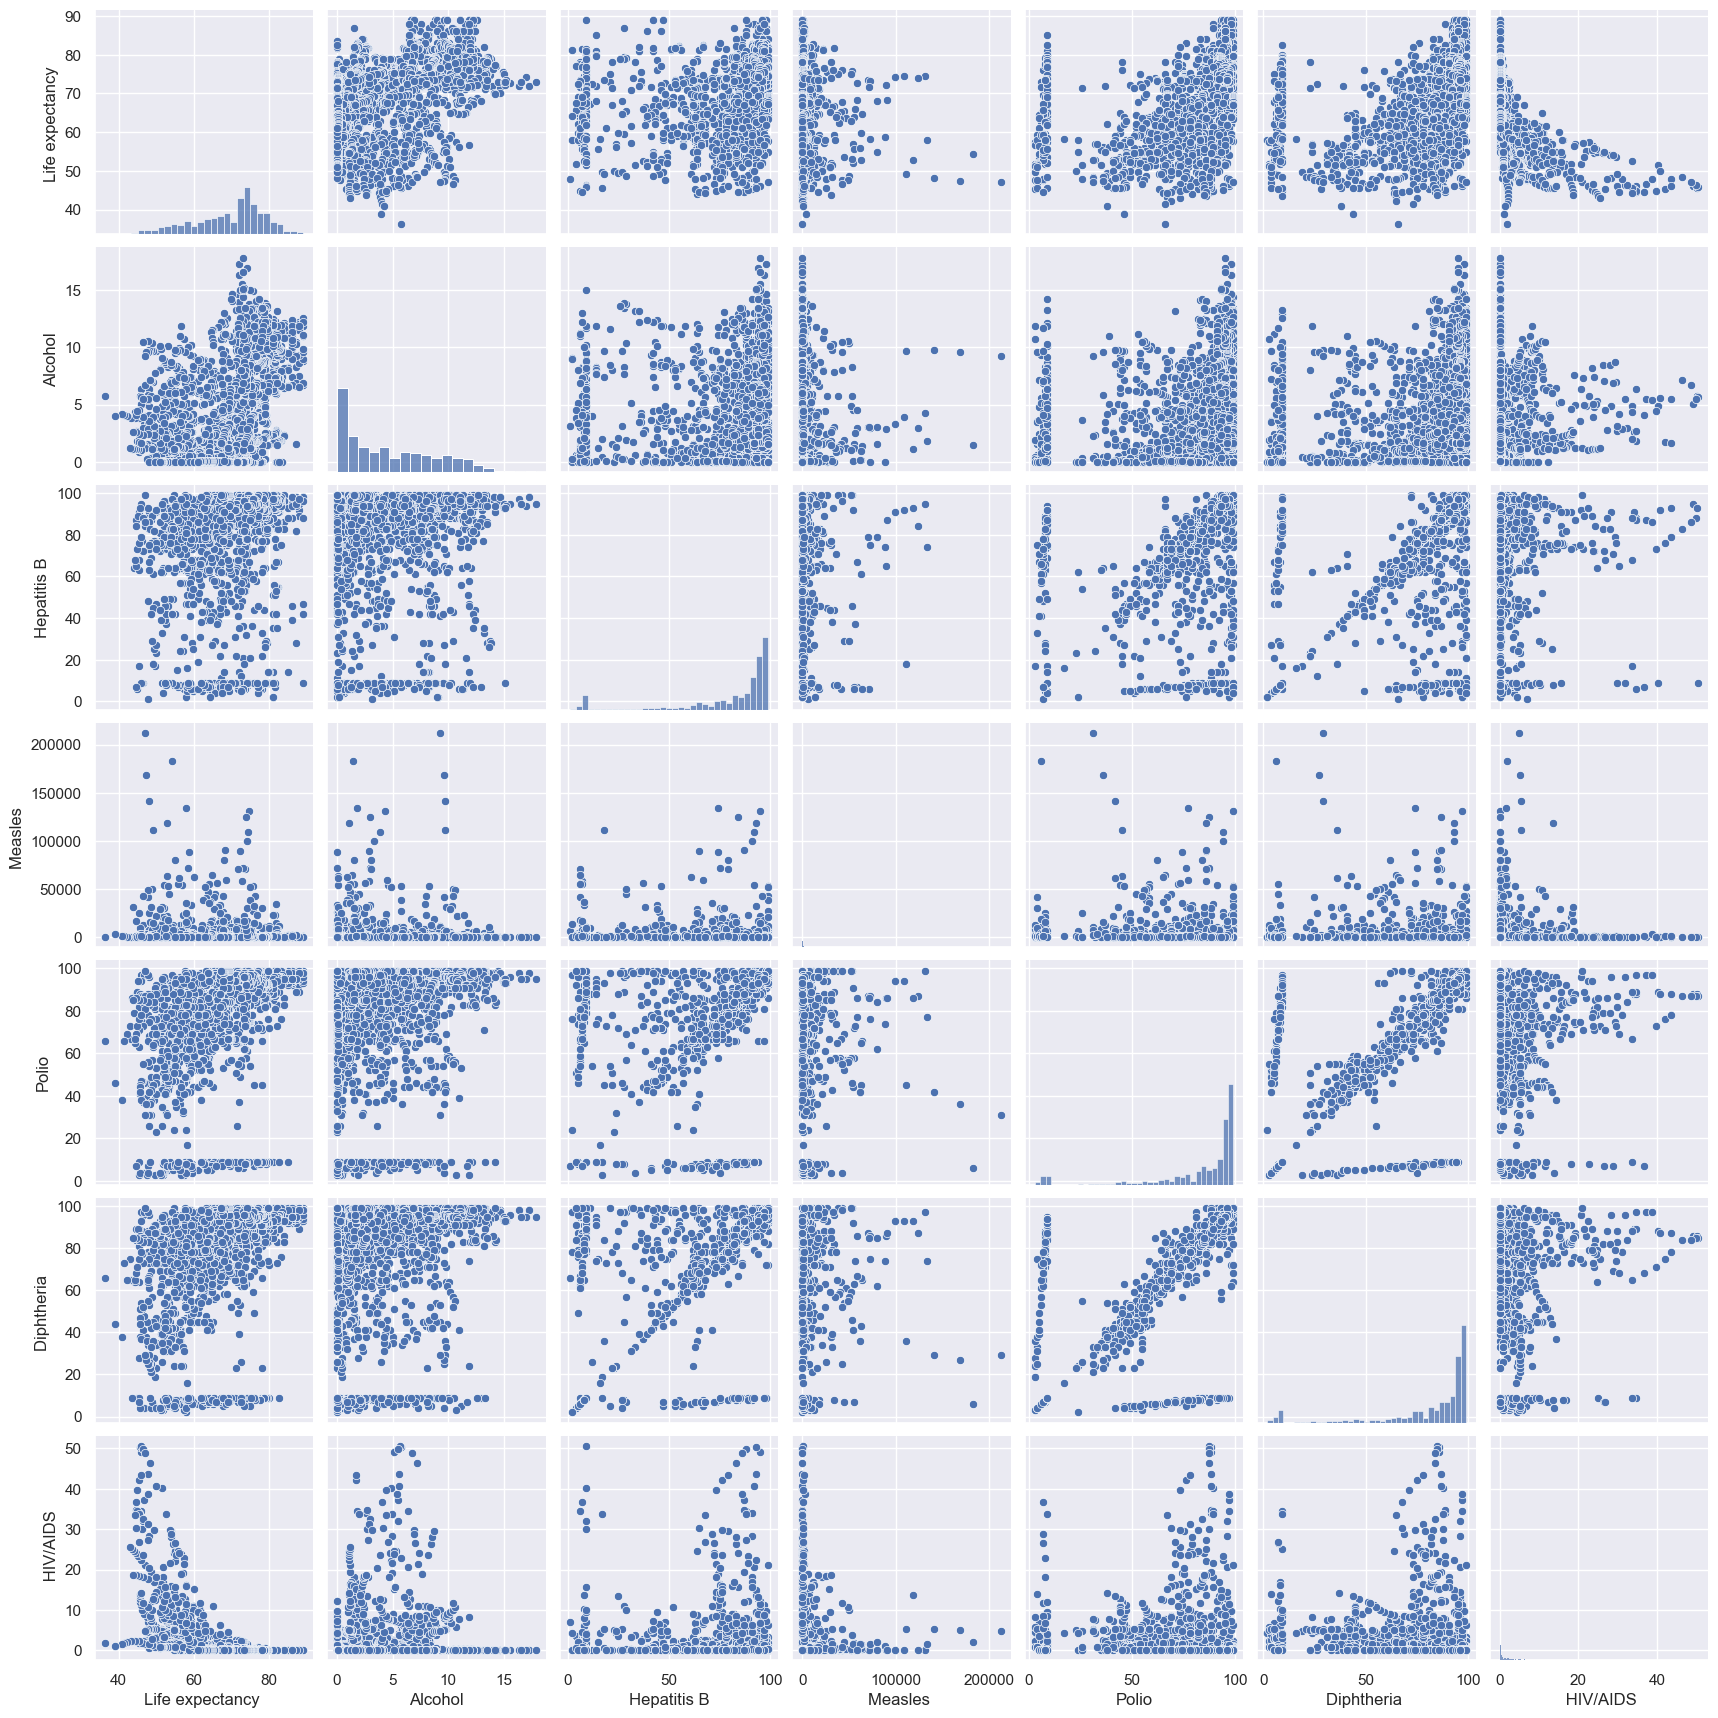

In [23]:
#Pairplot of Disease related variables

plt.figure(figsize=(8,4))
sns.pairplot(data=life_exp_df[['Life expectancy ','Alcohol', 'Hepatitis B',
       'Measles ', 'Polio','Diphtheria ', ' HIV/AIDS']],dropna=True)
plt.show()

<Figure size 800x400 with 0 Axes>

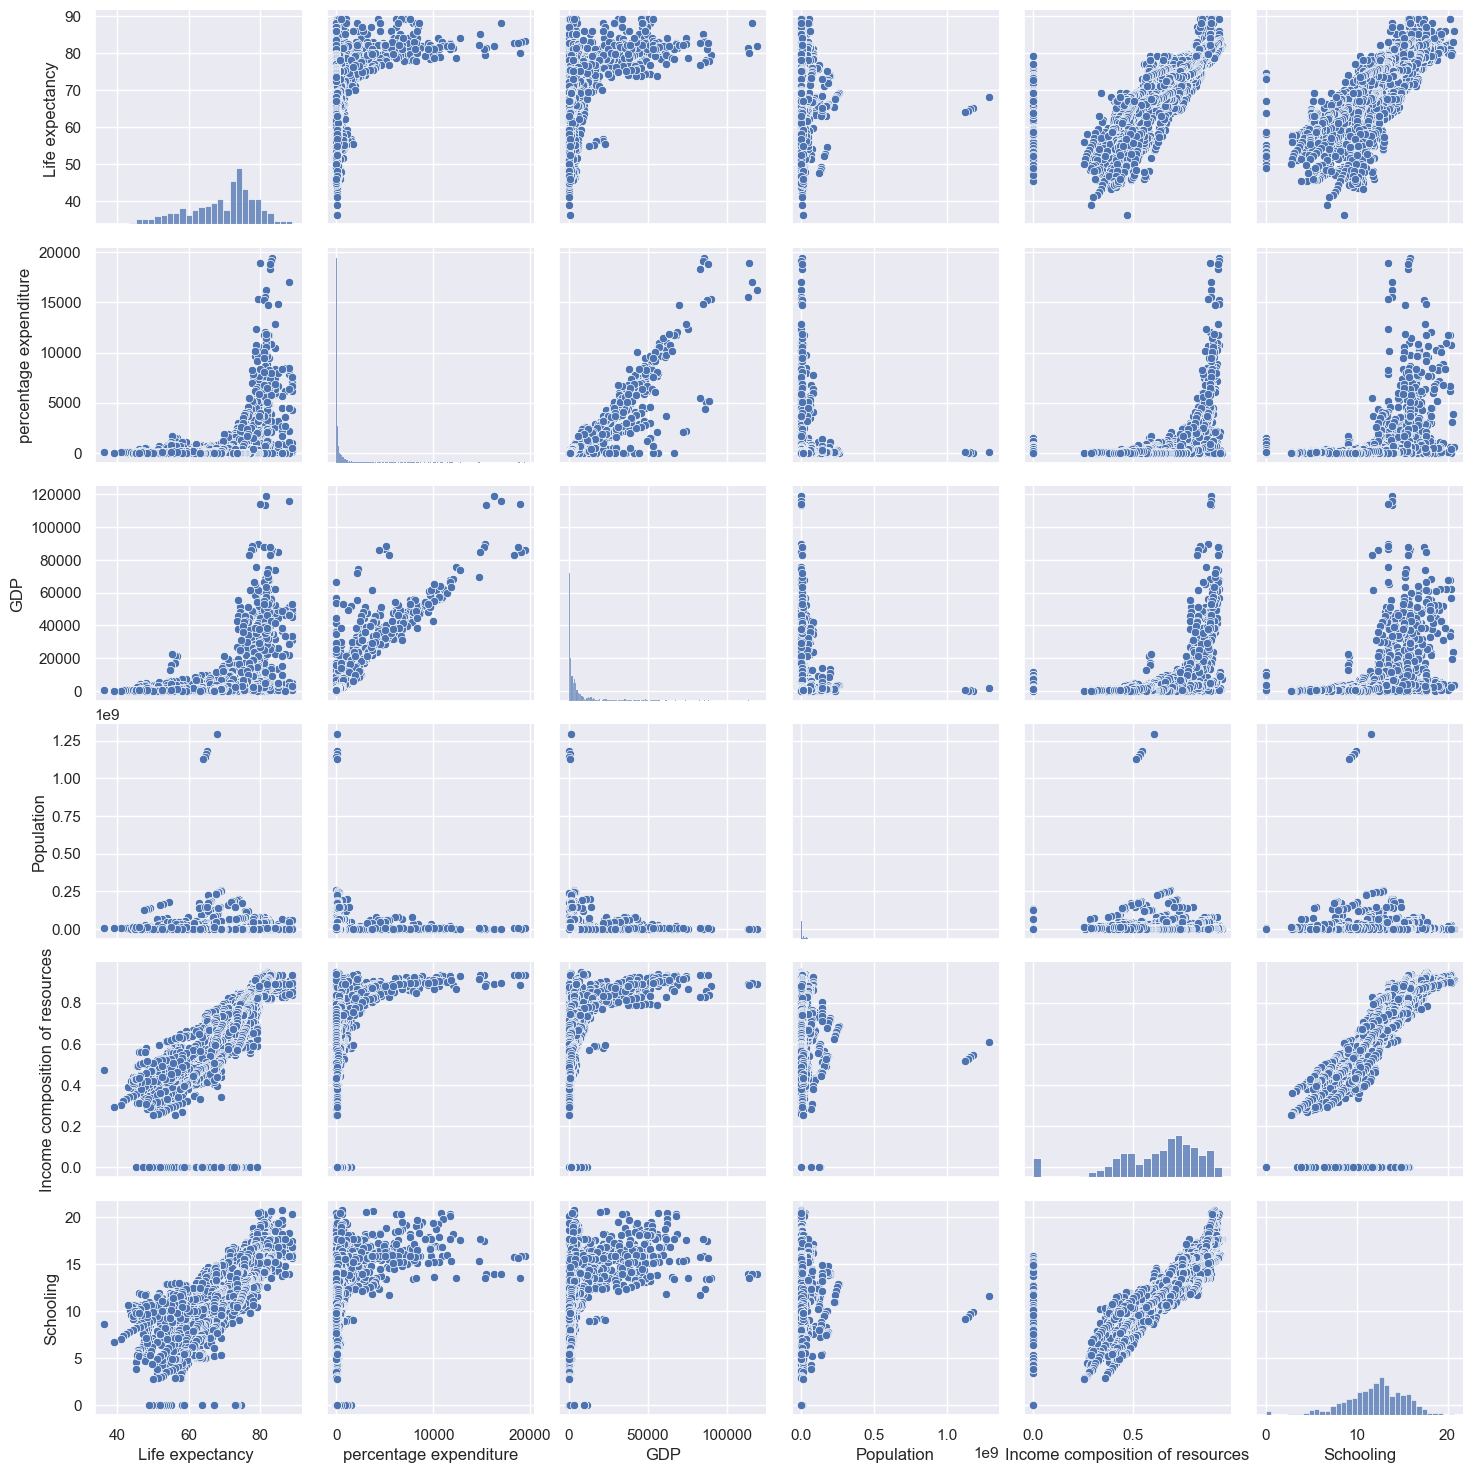

In [24]:
#Pairplot of Demography/Economics related variables 
plt.figure(figsize=(8,4))
sns.pairplot(data=life_exp_df[['Life expectancy ', 'percentage expenditure',
                               'GDP', 'Population',
                               'Income composition of resources', 'Schooling']],dropna=True)
plt.show()

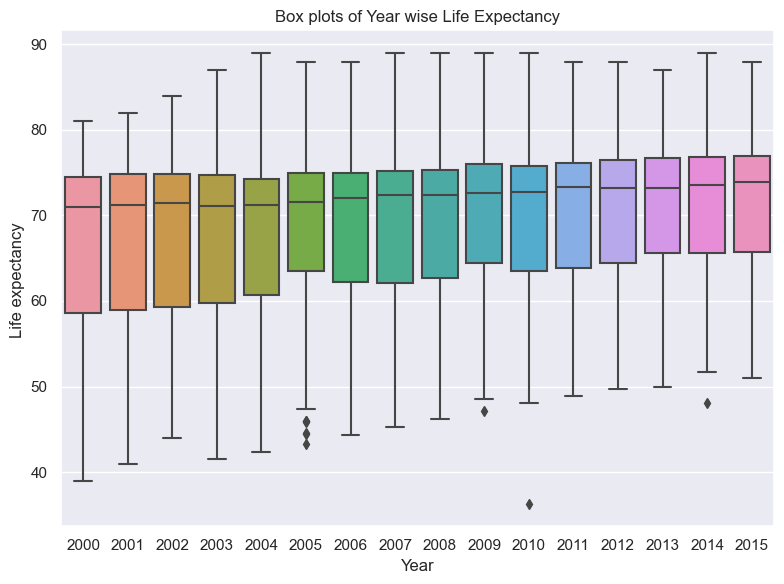

In [25]:
#boxplot of year wise life expectancy 
plt.figure(figsize=(8,6))
sns.boxplot(data=life_exp_df,x='Year',y='Life expectancy ')
plt.title('Box plots of Year wise Life Expectancy')
plt.tight_layout()

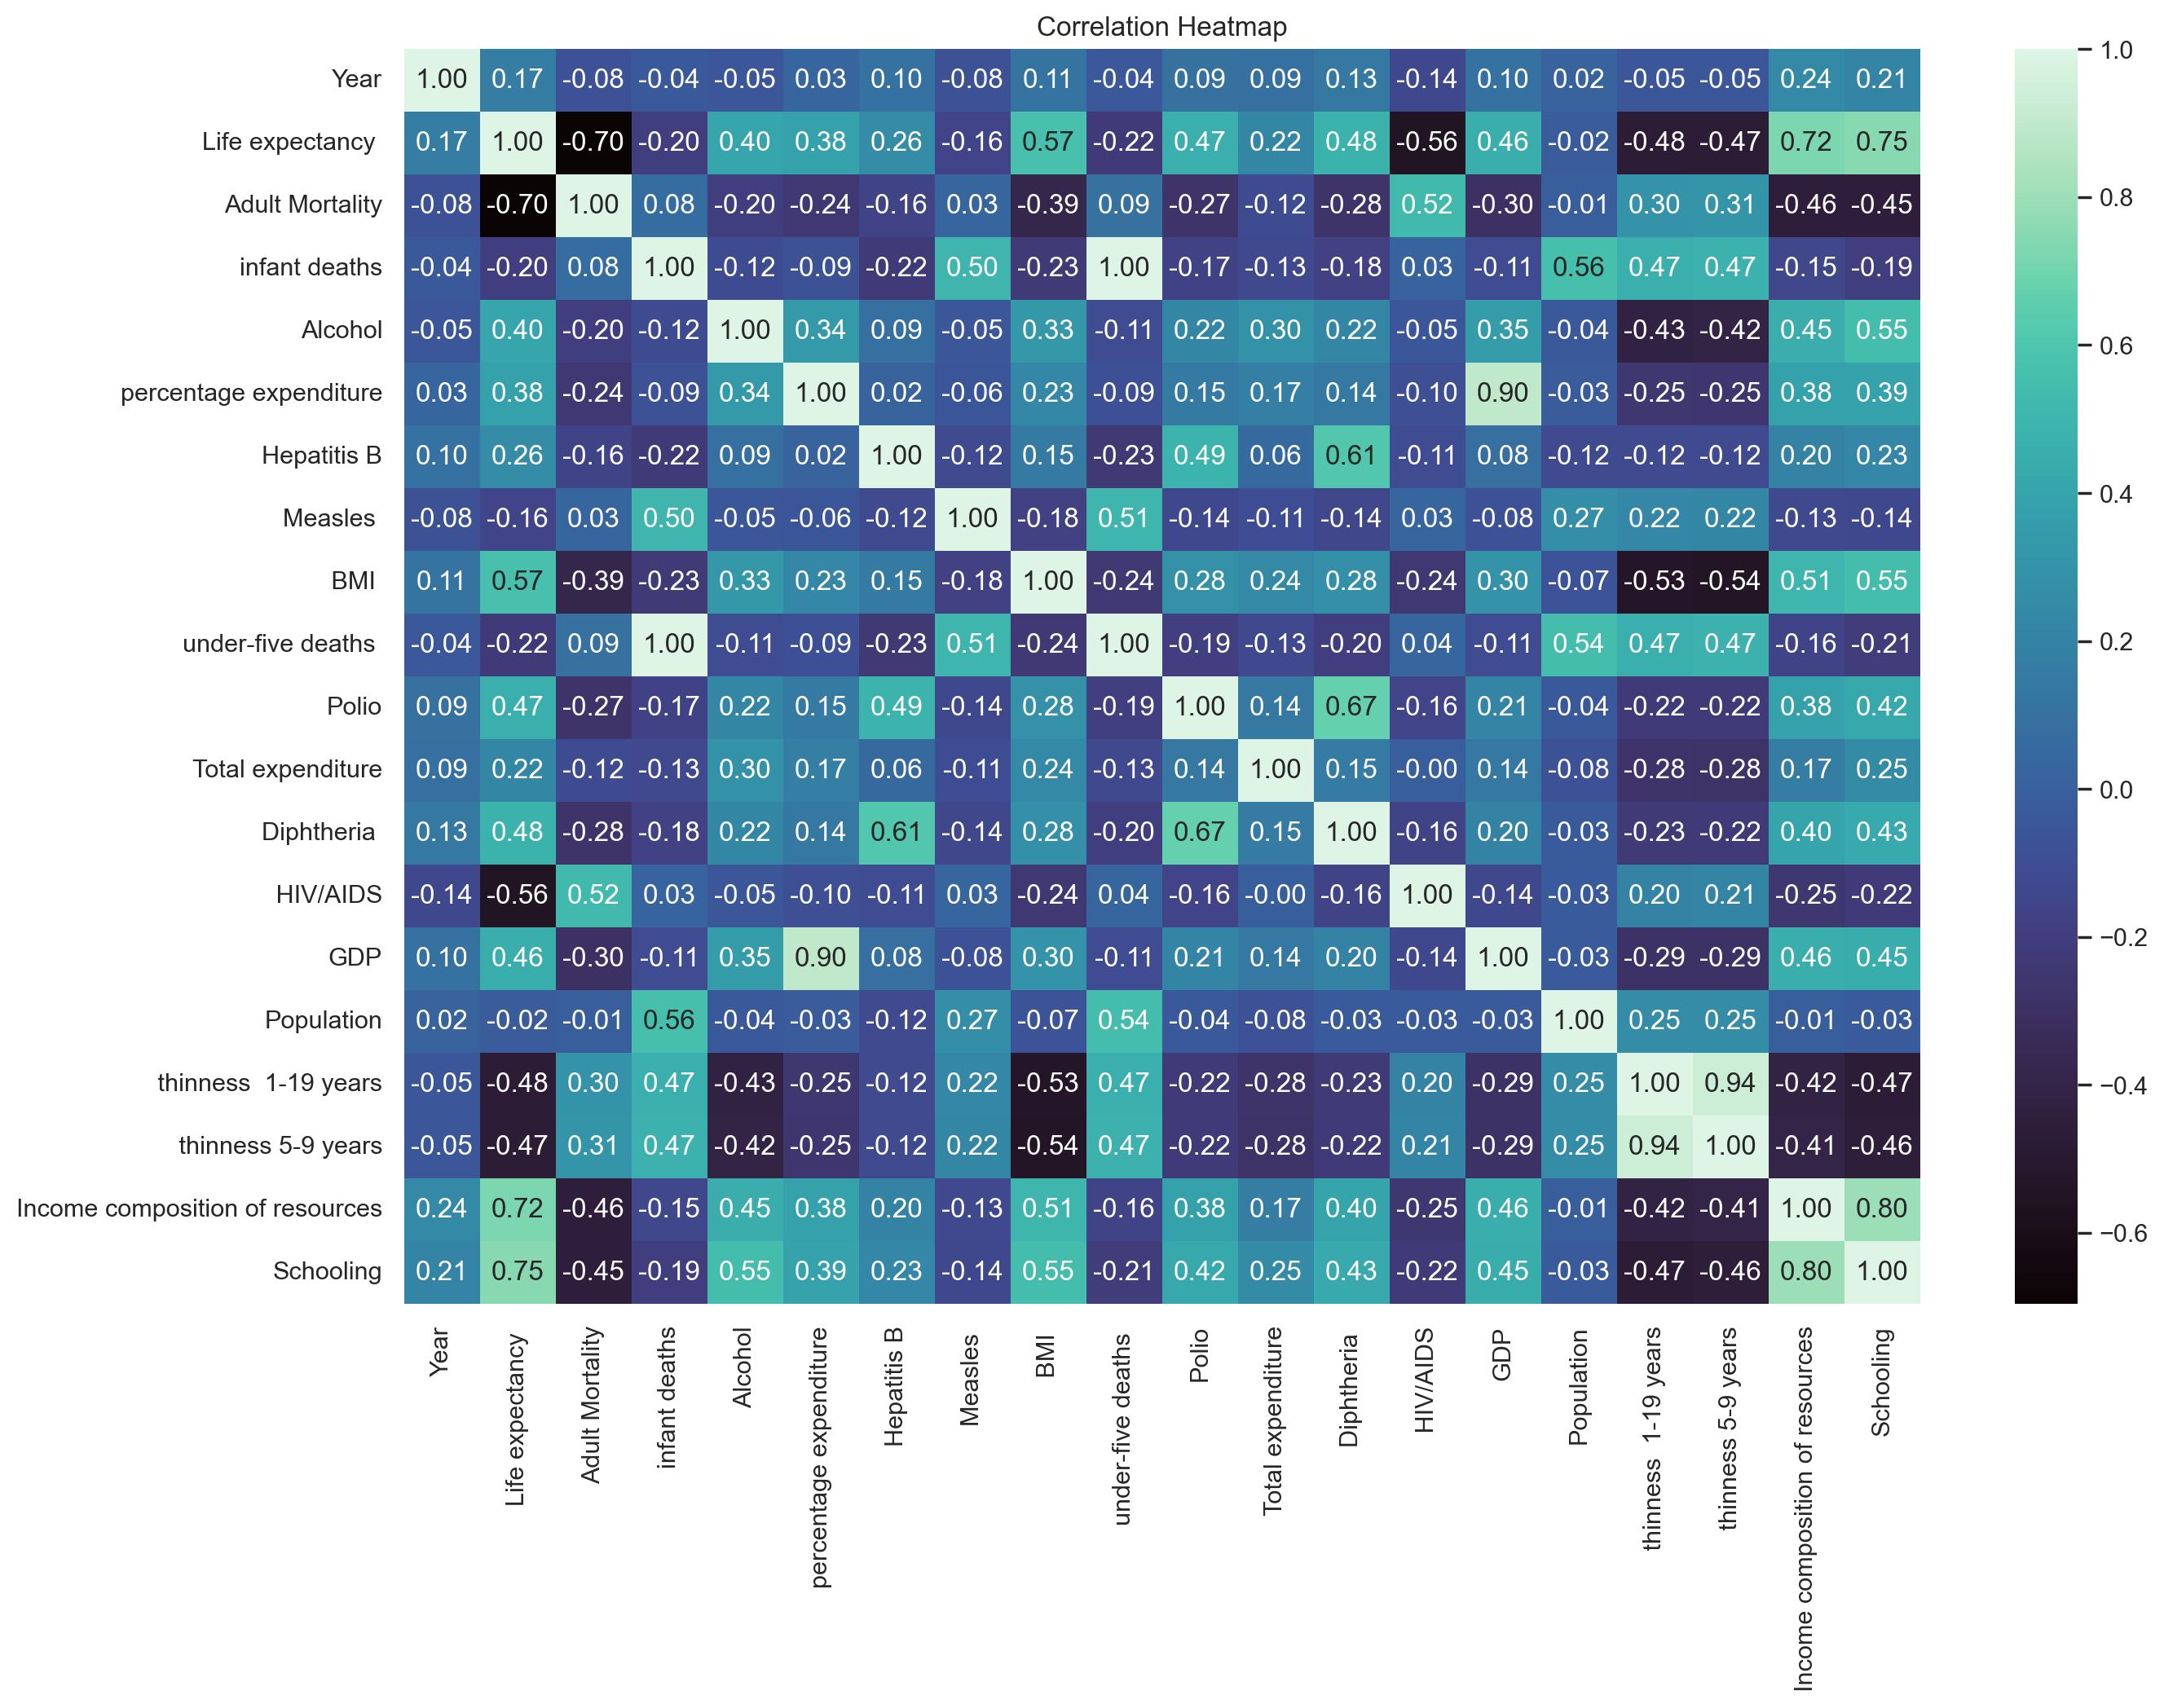

In [26]:
# Heatmap of correlations among numerical variables

plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(data = life_exp_df[numeric_cols].corr(),cmap='mako',annot=True,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

### 1. Drop rows with missing values of target depending on feature variables

In [31]:
#Check null values of all columns
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [32]:
#drop rows where Life Expectancy is Null
life_exp_df.dropna(subset=['Life expectancy '],axis=0,inplace=True)

In [33]:
#Verify if null values in Life Expectancy are dropped
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [34]:
#check rows where BMI is Null
life_exp_df[life_exp_df[' BMI '].isnull()]

Country  Year      Status     Life expectancy       Adult Mortality  \
2409  South Sudan  2015  Developing              57.3000             332.0000   
2410  South Sudan  2014  Developing              56.6000             343.0000   
2411  South Sudan  2013  Developing              56.4000             345.0000   
2412  South Sudan  2012  Developing              56.0000             347.0000   
2413  South Sudan  2011  Developing              55.4000             355.0000   
2414  South Sudan  2010  Developing              55.0000             359.0000   
2415  South Sudan  2009  Developing              54.3000             369.0000   
2416  South Sudan  2008  Developing              53.6000             377.0000   
2417  South Sudan  2007  Developing              53.1000             381.0000   
2418  South Sudan  2006  Developing              52.5000             383.0000   
2419  South Sudan  2005  Developing              51.9000             383.0000   
2420  South Sudan  2004  Developing              51.4000             383.0000   
2421  South Sudan  2003  Developing              58.0000             383.0000   
2422  South Sudan  2002  Developing              52.0000             382.0000   
2423  South Sudan  2001  Developing              49.6000             381.0000   
2424  South Sudan  2000  Developing              48.9000              38.0000   
2457        Sudan  2015  Developing              64.1000             225.0000   
2458        Sudan  2014  Developing              63.8000             229.0000   
2459        Sudan  2013  Developing              63.5000             232.0000   
2460        Sudan  2012  Developing              63.2000             235.0000   
2461        Sudan  2011  Developing              62.7000             241.0000   
2462        Sudan  2010  Developing              62.5000             243.0000   
2463        Sudan  2009  Developing              62.0000             248.0000   
2464        Sudan  2008  Developing              61.8000             251.0000   
2465        Sudan  2007  Developing              61.4000             254.0000   
2466        Sudan  2006  Developing              61.0000              26.0000   
2467        Sudan  2005  Developing              67.0000             261.0000   
2468        Sudan  2004  Developing              59.7000             278.0000   
2469        Sudan  2003  Developing              59.6000             278.0000   
2470        Sudan  2002  Developing              59.4000             277.0000   
2471        Sudan  2001  Developing              58.9000             283.0000   
2472        Sudan  2000  Developing              58.6000             284.0000   

      infant deaths              Alcohol  percentage expenditure  \
2409             26                  NaN                  0.0000   
2410             26                  NaN                 46.0745   
2411             26                  NaN                 47.4445   
2412             26                  NaN                 38.3382   
2413             27                  NaN                  0.0000   
2414             27                  NaN                  0.0000   
2415             27                  NaN                  0.0000   
2416             27                  NaN                  0.0000   
2417             27                  NaN                  0.0000   
2418             28                  NaN                  0.0000   
2419             28                  NaN                  0.0000   
2420             29                  NaN                  0.0000   
2421             29                  NaN                  0.0000   
2422             30                  NaN                  0.0000   
2423             30                  NaN                  0.0000   
2424             31                  NaN                  0.0000   
2457             58                  NaN                  0.0000   
2458             59               0.0100                253.6087   
2459             60               0.0100    

In [35]:
#rows with null BMI have null 'thinness 1-19 years' and 'thinness 5-9 years'
#drop rows where BMI,'thinness 1-19 years','thinness 5-9 years' is Null
life_exp_df.dropna(subset=[' BMI '],axis=0,inplace=True)

In [36]:
#Verify if null values are dropped
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            176
percentage expenditure               0
Hepatitis B                        533
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                8
Total expenditure                  212
Diphtheria                           8
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [37]:
#check rows where 'Polio' is Null
life_exp_df[life_exp_df['Polio'].isnull()]

Country  Year      Status     Life expectancy       Adult Mortality  \
1742   Montenegro  2005  Developing              73.6000             133.0000   
1743   Montenegro  2004  Developing              73.5000             134.0000   
1744   Montenegro  2003  Developing              73.5000             134.0000   
1745   Montenegro  2002  Developing              73.4000             136.0000   
1746   Montenegro  2001  Developing              73.3000             136.0000   
1747   Montenegro  2000  Developing              73.0000             144.0000   
2615  Timor-Leste  2001  Developing              59.4000             269.0000   
2616  Timor-Leste  2000  Developing              58.7000             276.0000   

      infant deaths              Alcohol  percentage expenditure  Hepatitis B  \
1742              0                  NaN                527.3077          NaN   
1743              0               0.0100                 57.1219          NaN   
1744              0               0.0100                495.0783          NaN   
1745              0               0.0100                 36.4802          NaN   
1746              0               0.0100                 33.6698          NaN   
1747              0               0.0100                274.5473          NaN   
2615              3               0.5000                  6.5566          NaN   
2616              3               0.5000                 49.0697          NaN   

      Measles                  BMI   under-five deaths   Polio  \
1742         0              55.7000                   0    NaN   
1743         0              55.0000                   0    NaN   
1744         0              54.2000                   0    NaN   
1745         0              53.5000                   0    NaN   
1746         0              52.7000                   0    NaN   
1747         0              51.9000                   0    NaN   
2615         0              12.3000                   4    NaN   
2616         0              11.9000                   4    NaN   

        Total expenditure  Diphtheria              HIV/AIDS  \
1742               8.4600          NaN               0.1000   
1743               8.4500          NaN               0.1000   
1744               8.9100          NaN               0.1000   
1745               8.3300          NaN               0.1000   
1746               8.2300          NaN               0.1000   
1747               7.3200          NaN               0.1000   
2615               3.7500          NaN               0.1000   
2616               3.2600          NaN               0.1000   

                      GDP           Population   thinness  1-19 years  \
1742           3,674.6179         614,261.0000                 2.3000   
1743             338.1995         613,353.0000                 2.3000   
1744           2,789.1735         612,267.0000                 2.4000   
1745             216.2433          69,828.0000                 2.5000   
1746             199.5840          67,389.0000                 2.5000   
1747           1,627.4289           6,495.0000                 2.6000   
2615              56.4250         892,531.0000                12.1000   
2616             422.2863          87,167.0000                12.2000   

       thinness 5-9 years  Income composition of resources  \
1742               2.3000                           0.7460   
1743               2.4000                           0.7400   
1744               2.4000                           0.0000   
1745               2.5000                           0.0000   
1746               2.6000                           0.0000   
1747               2.7000                           0.0000   
2615              12.2000                           0.4700   
2616              12.2000                           0.0000   

                Schooling  
1742              12.8000  
1743              12.6000  
1744               0.0000  
1745               0.0000  
1746               0.0000  
17

In [38]:
#rows with null 'Polio' have null 'Hepatitis B' and 'Diphtheria'
#drop rows with null 'Polio','Hepatitis B' and 'Diphtheria'
life_exp_df.dropna(subset=['Polio'],axis=0,inplace=True)

In [39]:
#Verify if null values are dropped
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [40]:
life_exp_df.shape

(2888, 22)

### 2. Create train-test split

In [42]:
X = life_exp_df.drop(columns=['Life expectancy ','Country'])
y = life_exp_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(
                                            X, y, test_size=0.3, random_state=42)


In [43]:
X_train.shape

(2021, 20)

### 3. Impute numerical features and One Hot Encode categorical features

In [45]:
#create imputers and ohe using Column Transformer

mean_features = ['Total expenditure', 'Schooling']
median_features = ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources']
ohe_features = ['Status']

preprocessor = ColumnTransformer(transformers=[
                                        ('mean_imputer',SimpleImputer(strategy='mean'),mean_features),
                                        ('median_imputer',SimpleImputer(strategy='median'),median_features),
                                        ('ohe', OneHotEncoder(categories='auto',drop='first'), ohe_features)],
                           remainder='passthrough')

In [46]:
#fit processor on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['Total expenditure', 'Schooling']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['Year', 'Adult Mortality', 'infant deaths',
                                  'Alcohol', 'percentage expenditure',
                                  'Hepatitis B', 'Measles ', ' BMI ',
                                  'under-five deaths ', 'Polio', 'Diphtheria ',
                                  ' HIV/AIDS', 'GDP', 'Population',
                                  ' thinness  1-19 years',
                                  ' thinness 5-9 years',
                                  'Income composition of resources']),
                                ('ohe', OneHotEncoder(drop='first'),
                                 ['Status'])])

In [47]:
#transform training and test data
X_train_arr = preprocessor.transform(X_train)
X_test_arr = preprocessor.transform(X_test)

In [48]:
#create dataframes from the transformed arrays

X_train_trans = pd.DataFrame(data = X_train_arr, columns=
                                         ['Total expenditure', 'Schooling','Year', 'Adult Mortality',
                                           'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B',
                                           'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                                           'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                                           ' thinness  1-19 years', ' thinness 5-9 years',
                                           'Income composition of resources','Status'])

X_test_trans = pd.DataFrame(data = X_test_arr, columns=
                                         ['Total expenditure', 'Schooling','Year', 'Adult Mortality',
                                           'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B',
                                           'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                                           'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                                           ' thinness  1-19 years', ' thinness 5-9 years',
                                           'Income composition of resources','Status'])

In [49]:
#rearrange columns according to the original dataframe

X_train_trans = X_train_trans.loc[:,['Year', 'Status', 'Adult Mortality',
                       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                       ' thinness  1-19 years', ' thinness 5-9 years',
                       'Income composition of resources', 'Schooling']]


X_test_trans = X_test_trans.loc[:,['Year', 'Status', 'Adult Mortality',
                       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                       ' thinness  1-19 years', ' thinness 5-9 years',
                       'Income composition of resources', 'Schooling']]

In [50]:
#check missing values in training set
X_train_trans.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [51]:
#check missing values in test set
X_test_trans.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### 4. Outlier Handling

In [55]:
numeric_cols = ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

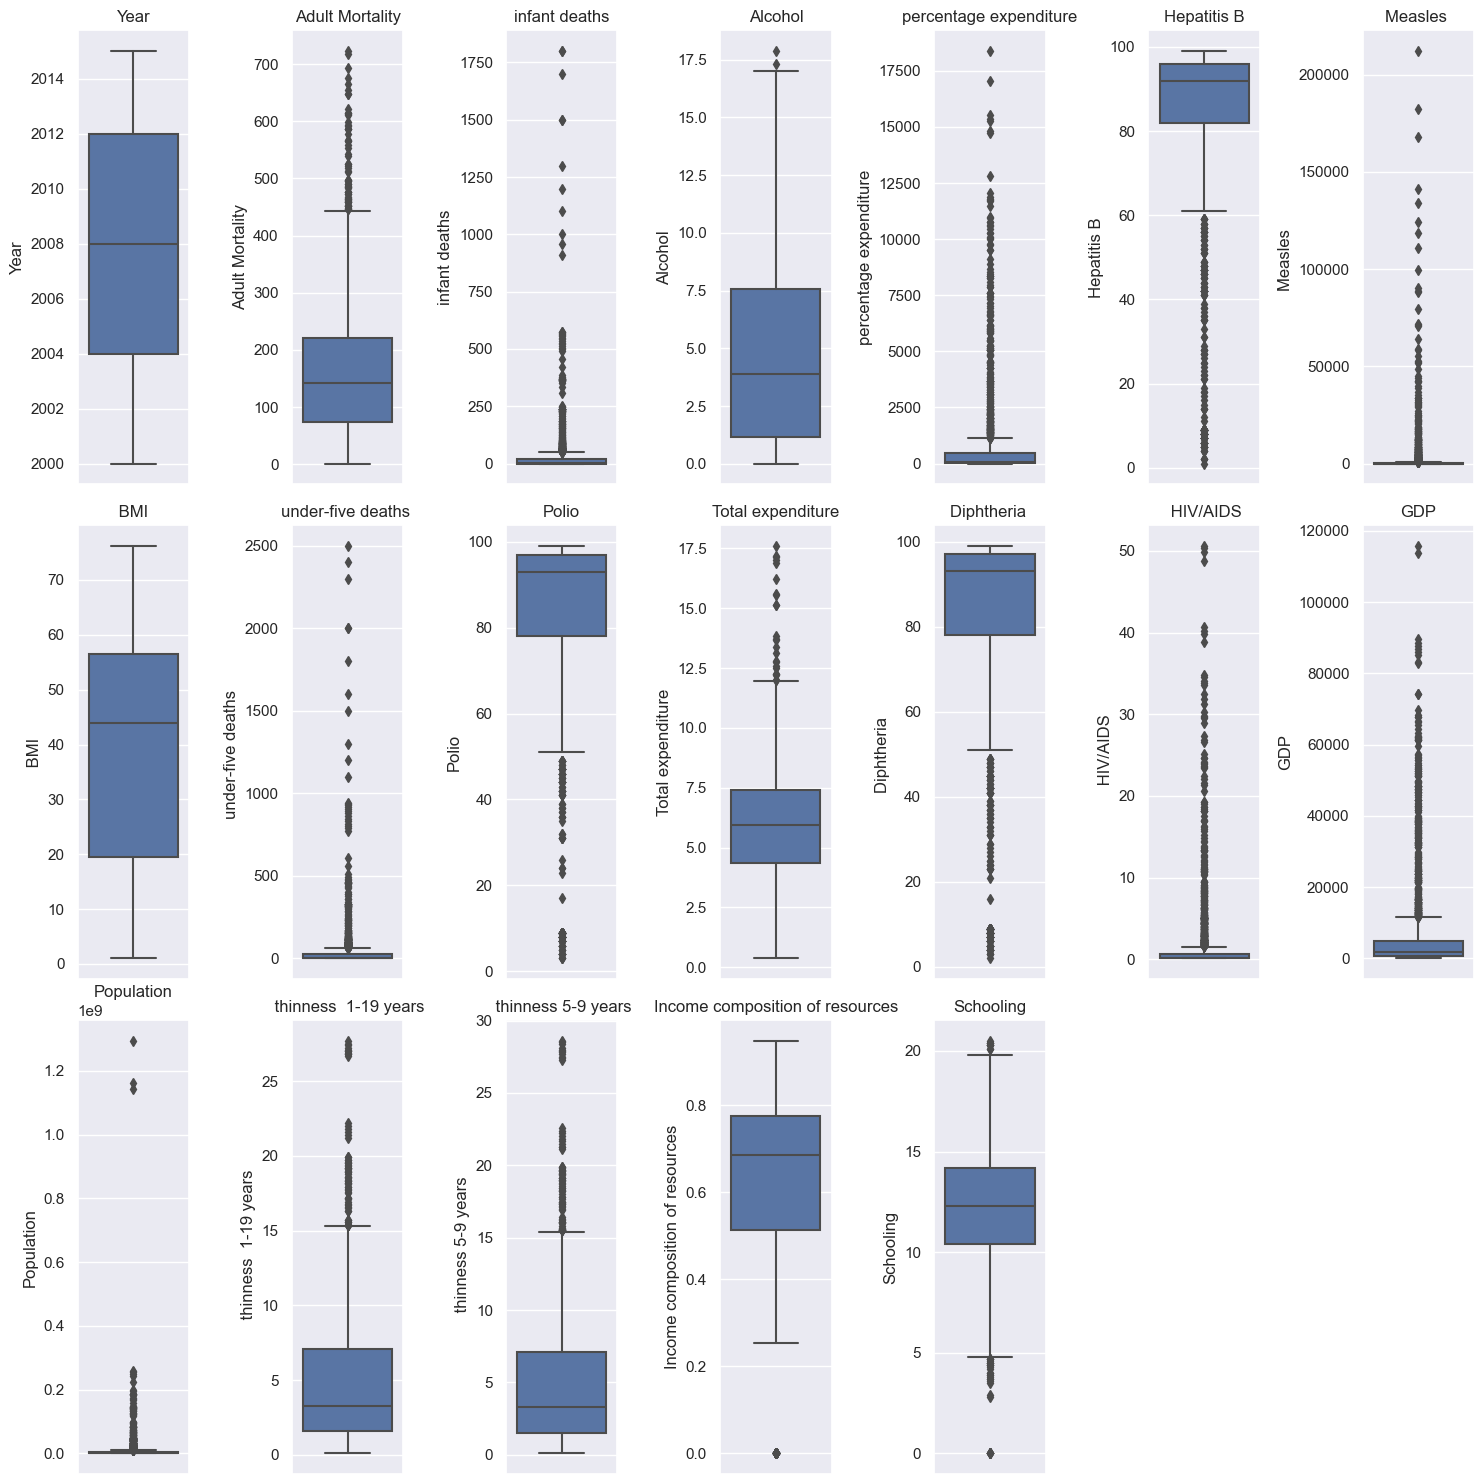

In [56]:
#Check for outliers in training set using boxplot

num_cols = 7
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
fig,axes = plt.subplots(num_rows,num_cols,figsize=(15,num_rows * 5))
axes = axes.flatten()

for i,col in enumerate(numeric_cols):
    sns.boxplot(y=X_train_trans[col],ax=axes[i])
    axes[i].set(title=col)

for i in range(len(numeric_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [57]:
#Function to get interquartile range and define boundaries
def get_boundaries(col_name):    
    iqr = X_train_trans[col_name].quantile(0.75) - X_train_trans[col_name].quantile(0.25)
    lower_bound = X_train_trans[col_name].quantile(0.25) - 1.5*iqr
    upper_bound = X_train_trans[col_name].quantile(0.75) + 1.5*iqr
    return (lower_bound,upper_bound)    

In [58]:
#Replace outliers by upper and lower boundaries in training set
for i in numeric_cols:
    X_train_trans[i][X_train_trans[i]<get_boundaries(i)[0]] = get_boundaries(i)[0]
    X_train_trans[i][X_train_trans[i]>get_boundaries(i)[1]] = get_boundaries(i)[1]

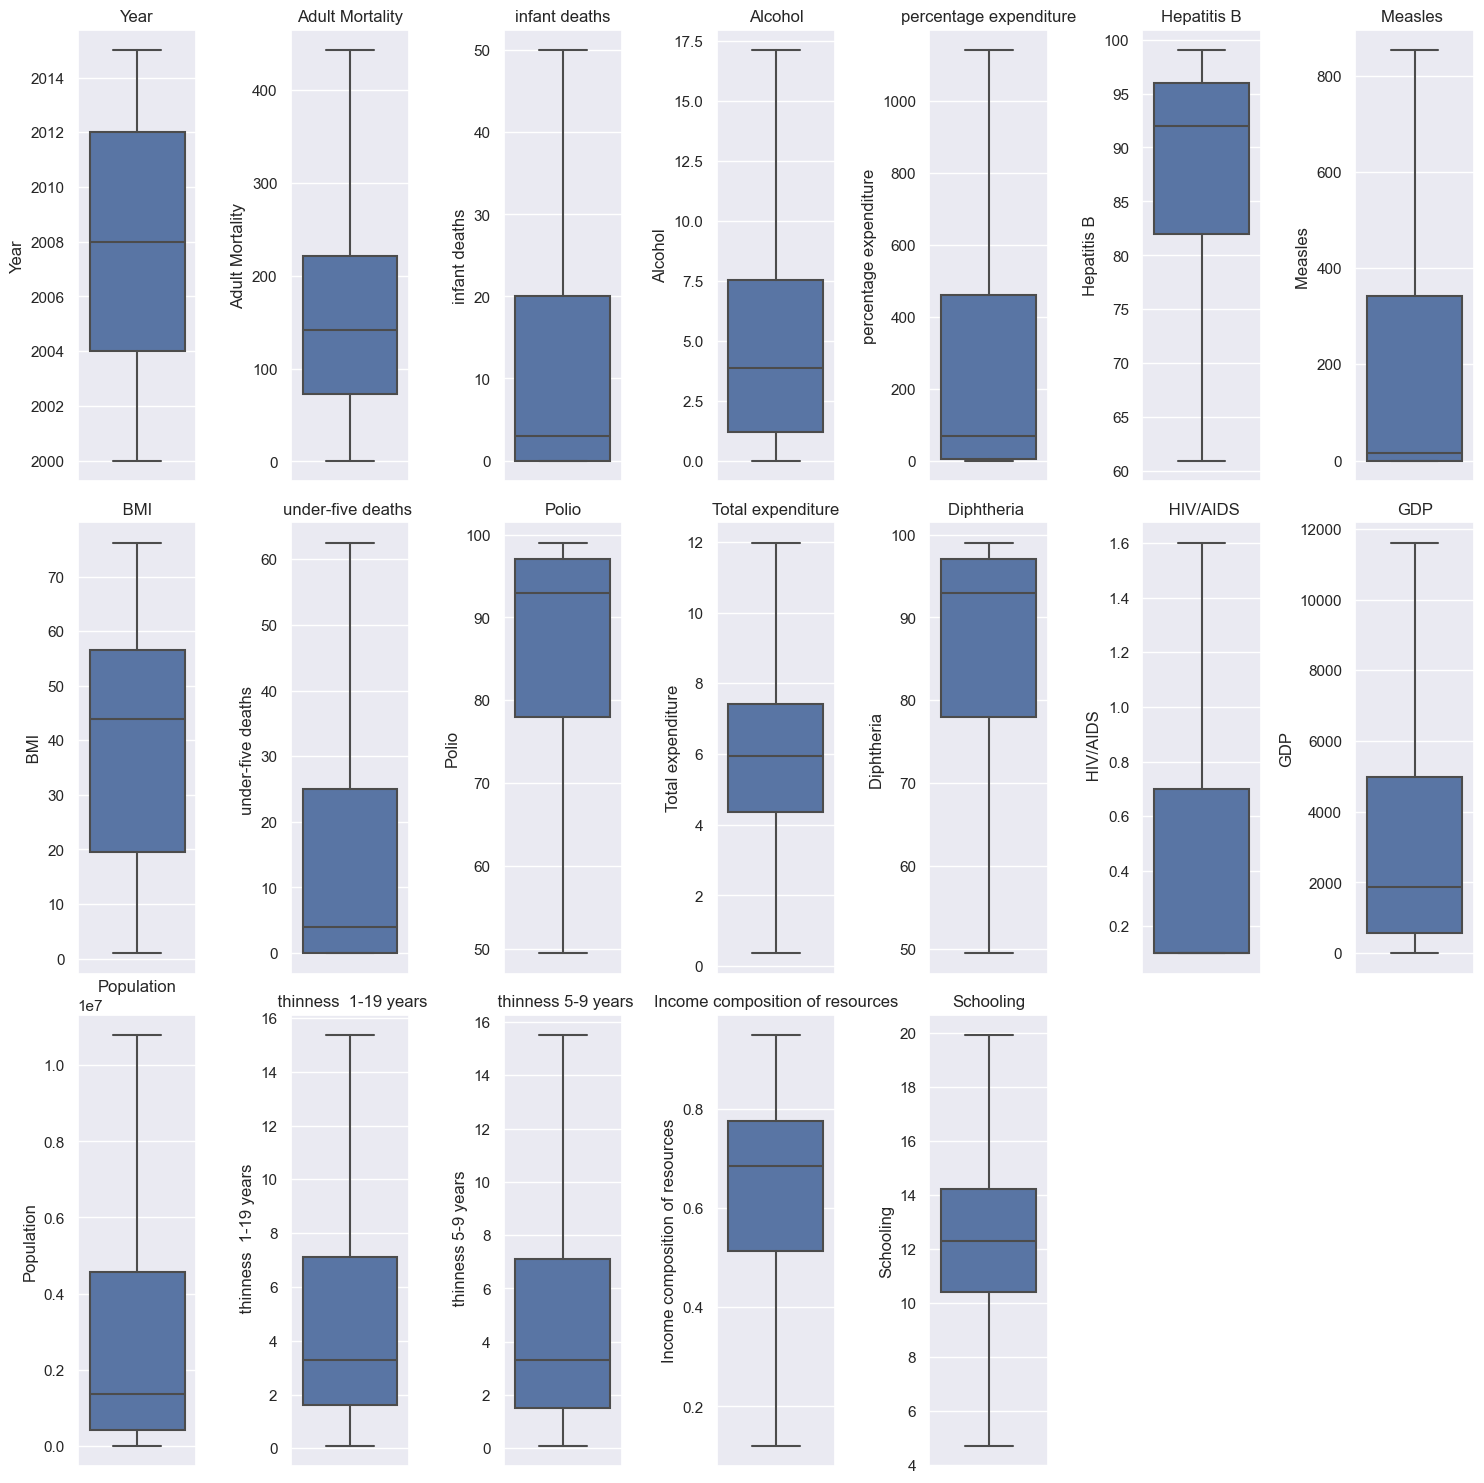

In [59]:
#Check for outliers in training set using boxplot

num_cols = 7
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
fig,axes = plt.subplots(num_rows,num_cols,figsize=(15,num_rows * 5))
axes = axes.flatten()

for i,col in enumerate(numeric_cols):
    sns.boxplot(y=X_train_trans[col],ax=axes[i])
    axes[i].set(title=col)

for i in range(len(numeric_cols), num_rows * num_cols):
    fig.delaxes(axes[i])
    

plt.tight_layout()
plt.show()

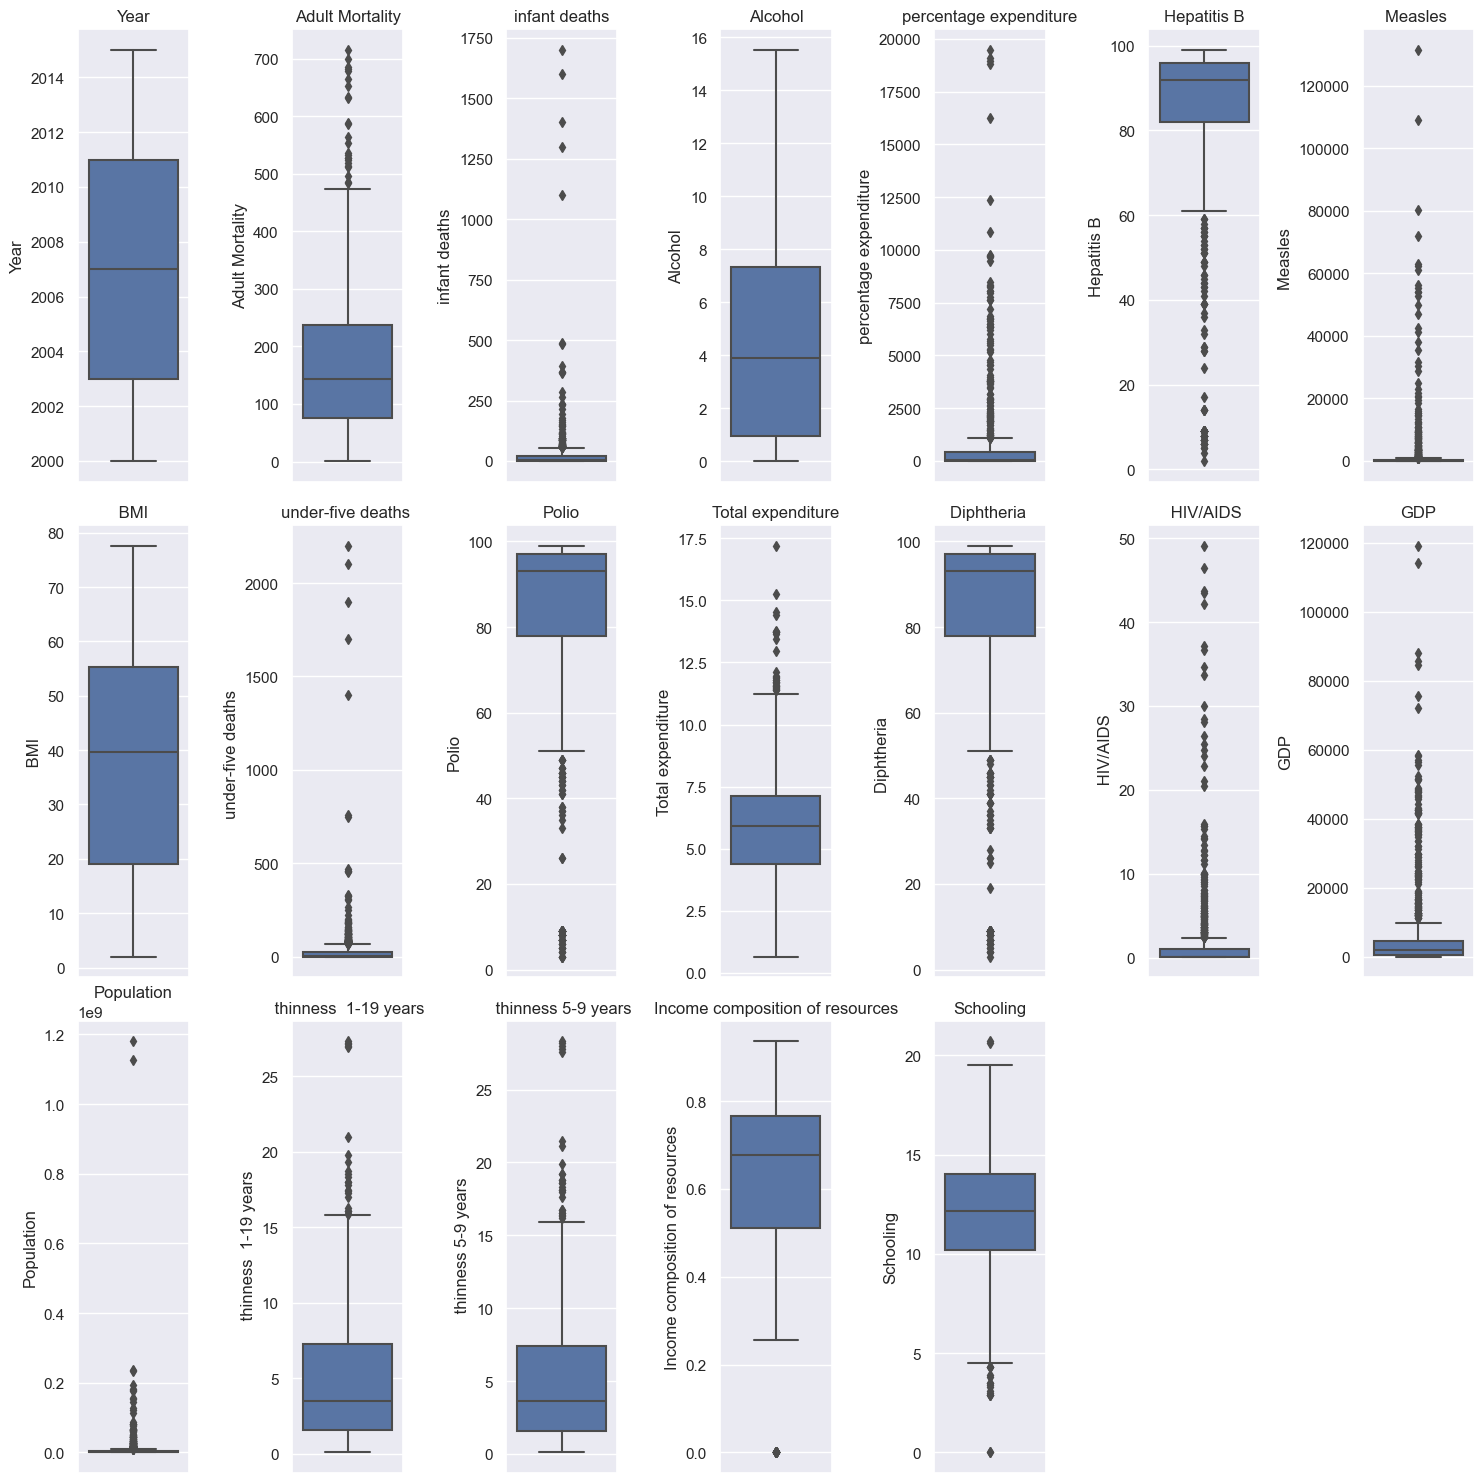

In [60]:
#Check for outliers in test set using boxplot


num_cols = 7
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
fig,axes = plt.subplots(num_rows,num_cols,figsize=(15,num_rows * 5))
axes = axes.flatten()

for i,col in enumerate(numeric_cols):
    sns.boxplot(y=X_test_trans[col],ax=axes[i])
    axes[i].set(title=col)

for i in range(len(numeric_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [61]:
#Apply transformation on test set by using boundaries of training set

for i in numeric_cols:
    X_test_trans[i][X_test_trans[i]<get_boundaries(i)[0]] = get_boundaries(i)[0]
    X_test_trans[i][X_test_trans[i]>get_boundaries(i)[1]] = get_boundaries(i)[1]

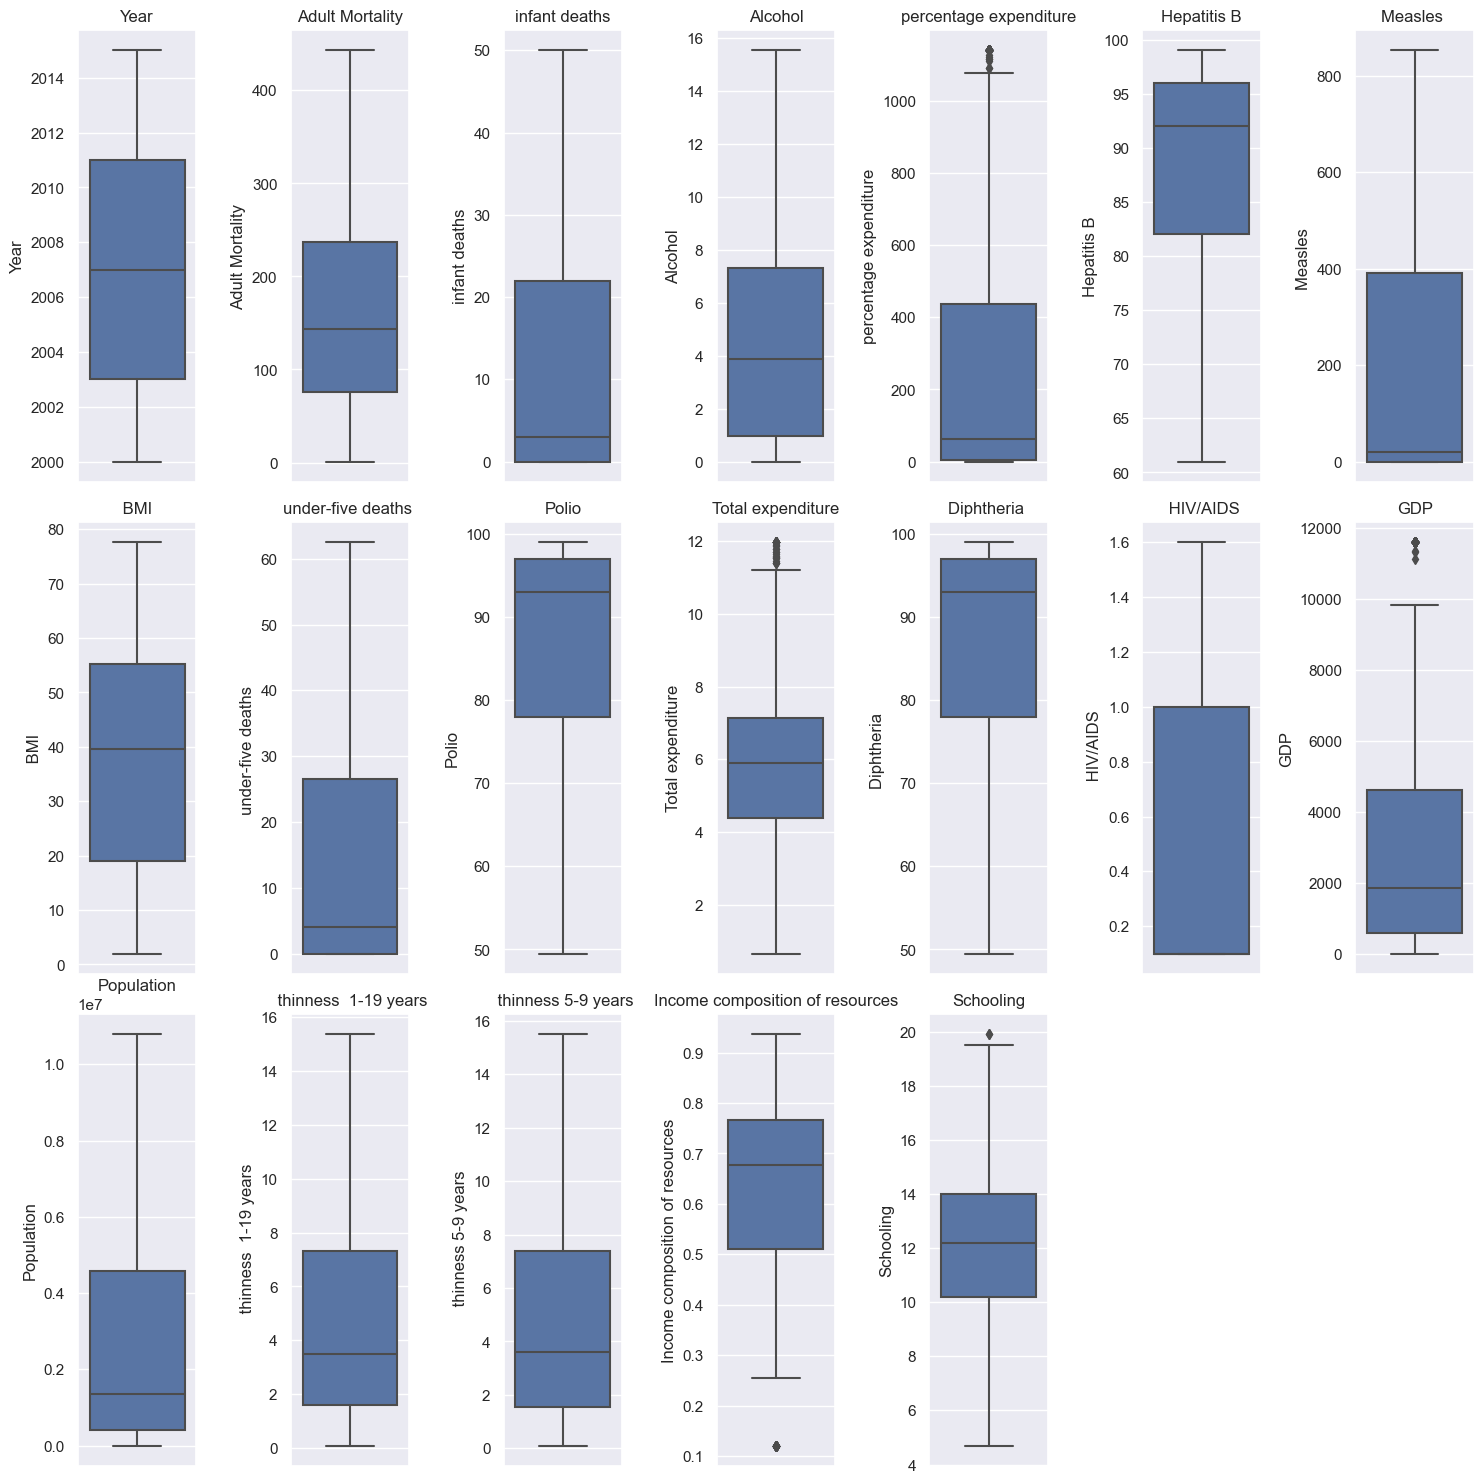

In [62]:
#Check for outliers in test set using boxplot

num_cols = 7
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
fig,axes = plt.subplots(num_rows,num_cols,figsize=(15,num_rows * 5))
axes = axes.flatten()

for i,col in enumerate(numeric_cols):
    sns.boxplot(y=X_test_trans[col],ax=axes[i])
    axes[i].set(title=col)

for i in range(len(numeric_cols), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 5. Scaling features

In [64]:
#initialize the scaler
scaler = StandardScaler()

In [65]:
#fit on training set
scaler.fit(X_train_trans[numeric_cols])

StandardScaler()

In [66]:
#transform training and test set
X_train_trans_num_arr = scaler.transform(X_train_trans[numeric_cols])
X_test_trans_num_arr = scaler.transform(X_test_trans[numeric_cols])

In [67]:
#encode back to dataframe
X_train_trans_final = pd.DataFrame(X_train_trans_num_arr,columns=numeric_cols)
X_test_trans_final = pd.DataFrame(X_test_trans_num_arr,columns=numeric_cols)

In [68]:
#rearrange columns according to the original dataframe

X_train_trans_final['Status'] = X_train_trans['Status']
X_train_trans_final = X_train_trans_final.loc[:,['Year', 'Status', 'Adult Mortality',
                       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                       ' thinness  1-19 years', ' thinness 5-9 years',
                       'Income composition of resources', 'Schooling']]

In [69]:
#rearrange columns according to the original dataframe

X_test_trans_final['Status'] = X_test_trans['Status']
X_test_trans_final = X_test_trans_final.loc[:,['Year', 'Status', 'Adult Mortality',
                       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
                       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
                       ' thinness  1-19 years', ' thinness 5-9 years',
                       'Income composition of resources', 'Schooling']]

In [70]:
X_train_trans_final.shape

(2021, 20)

In [71]:
X_train_trans_final.head()

Year               Status      Adult Mortality  \
0               0.3124               1.0000               0.9044   
1              -0.5581               1.0000              -0.1675   
2              -1.4286               1.0000               2.5480   
3               0.7476               1.0000               1.1366   
4              -0.3405               1.0000              -0.3283   

         infant deaths              Alcohol  percentage expenditure  \
0               0.6922              -0.8893                 -0.5568   
1               0.8052              -1.1823                 -0.7322   
2              -0.4385              -0.4560                 -0.6370   
3              -0.1558              -0.9606                 -0.6744   
4              -0.4950              -1.0345                  0.0416   

           Hepatitis B             Measles                  BMI   \
0              -0.6515               1.8779              -0.8111   
1               0.5654              -0.6392               0.4924   
2               0.4031              -0.0140              -0.6657   
3              -1.7061              -0.6601               0.3521   
4               0.8899              -0.6571               0.9988   

    under-five deaths                 Polio    Total expenditure  \
0               0.9851              -2.2958              -0.6355   
1               0.6786               0.6032               0.2999   
2              -0.4160              -0.4799               0.7064   
3              -0.1533              -1.0533              -0.4257   
4              -0.5474               0.7944               1.2615   

           Diphtheria              HIV/AIDS                  GDP  \
0              -0.4119               1.8948              -0.7111   
1               0.6087              -0.6258              -0.4416   
2              -0.4757               1.8948              -0.8009   
3              -0.8584               0.8866              -0.8666   
4               0.8001              -0.6258              -0.2706   

            Population   thinness  1-19 years   thinness 5-9 years  \
0              -0.5874                 0.8095               0.7800   
1              -0.4695                 0.6839               0.7551   
2              -0.3279                 1.6134               1.6030   
3               1.0814                -0.8486              -0.8409   
4               0.7319                -0.1954              -0.2175   

   Income composition of resources            Schooling  
0                          -1.0401              -0.9567  
1                           0.2366              -0.2650  
2                          -1.0668              -0.6273  
3                          -0.7944              -0.7591  
4                           0.4823               0.4927

In [72]:
X_test_trans_final.head()

Year               Status      Adult Mortality  \
0               0.0948               1.0000               0.3685   
1               0.3124               1.0000               0.2791   
2               0.9653               1.0000              -0.9803   
3              -1.2110               1.0000               0.6007   
4              -0.9934               1.0000               2.5480   

         infant deaths              Alcohol  percentage expenditure  \
0               0.1834              -0.6140                 -0.6011   
1               2.1054              -1.1645                 -0.4216   
2               1.7097               0.6958                  1.9595   
3              -0.6646               0.5251                 -0.7322   
4               0.7487              -0.1502                 -0.7322   

           Hepatitis B             Measles                  BMI   \
0               0.3220               1.8779              -1.1721   
1              -0.4081               1.8779              -0.8312   
2              -1.5439              -0.5648               0.5025   
3               0.9710               1.8779               0.4273   
4              -2.1118               1.8779              -0.6005   

    under-five deaths                 Polio    Total expenditure  \
0               0.0656               0.3484              -0.1590   
1               2.0140              -0.0339              -1.3479   
2               1.7294              -1.3082               1.2571   
3              -0.6787               0.7944               1.0473   
4               1.0727              -2.2958               0.2649   

           Diphtheria              HIV/AIDS                  GDP  \
0               0.3536               0.3825              -0.7231   
1              -0.4757              -0.2897              -0.3420   
2              -1.3049               1.8948               0.9952   
3               0.7363              -0.6258              -0.4416   
4              -1.1136               1.8948              -0.7970   

            Population   thinness  1-19 years   thinness 5-9 years  \
0              -0.7852                 1.6385               1.6778   
1               2.0024                -0.7481              -0.7661   
2               0.5545                 0.3322               0.6553   
3              -0.4695                -0.3210              -0.2674   
4               2.0024                 1.2868               1.3037   

   Income composition of resources            Schooling  
0                          -0.7036              -0.5615  
1                           0.0123              -0.1662  
2                           0.0069               0.1962  
3                           0.2259              -0.0078  
4                          -1.2004              -0.8909

## Evaluation Metrics

In [76]:
#Create Evaluation function

def get_eval_metrics(y_true, y_pred):
    mae = np.round(mean_absolute_error(y_true, y_pred),2)
    rmse = np.round(root_mean_squared_error(y_true, y_pred),2)
    mape = np.round(100*mean_absolute_percentage_error(y_true, y_pred),2)
    r2 = np.round(r2_score(y_true, y_pred),2)
    return r2, rmse, mae, mape

In [77]:
#create evaluation matrix 
algorithms = ['LinReg', 'LASSOReg', 'RidgeReg','ElasticNetReg','PolynomialReg','GAM', 'SVR','DecisionTree',
             'RandomForest','AdaBoost','GradientBoosting','XGBoost', 'LightGBM']
eval_metrics = ['R2_score','RMSE', 'MAE', 'MAPE'] 

train_perf_reg = pd.DataFrame(columns=algorithms,index=eval_metrics)
test_perf_reg = pd.DataFrame(columns=algorithms,index=eval_metrics)

## Algorithms

### 1. Linear Regression

In [80]:
#Initialize and fit the model
linear = LinearRegression()
linear.fit(X_train_trans_final,y_train)

LinearRegression()

In [81]:
#get predictions
y_fit = linear.predict(X_train_trans_final)
y_pred = linear.predict(X_test_trans_final)

In [82]:
#Evaluate the Model
train_perf_reg['LinReg'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['LinReg'] = get_eval_metrics(y_test,y_pred)

In [83]:
train_perf_reg

LinReg LASSOReg RidgeReg ElasticNetReg PolynomialReg  \
R2_score               0.8500      NaN      NaN           NaN           NaN   
RMSE                   3.6500      NaN      NaN           NaN           NaN   
MAE                    2.7200      NaN      NaN           NaN           NaN   
MAPE                   4.1500      NaN      NaN           NaN           NaN   

          GAM  SVR DecisionTree RandomForest AdaBoost GradientBoosting  \
R2_score  NaN  NaN          NaN          NaN      NaN              NaN   
RMSE      NaN  NaN          NaN          NaN      NaN              NaN   
MAE       NaN  NaN          NaN          NaN      NaN              NaN   
MAPE      NaN  NaN          NaN          NaN      NaN              NaN   

         XGBoost LightGBM  
R2_score     NaN      NaN  
RMSE         NaN      NaN  
MAE          NaN      NaN  
MAPE         NaN      NaN

In [84]:
test_perf_reg

LinReg LASSOReg RidgeReg ElasticNetReg PolynomialReg  \
R2_score               0.8500      NaN      NaN           NaN           NaN   
RMSE                   3.6900      NaN      NaN           NaN           NaN   
MAE                    2.7600      NaN      NaN           NaN           NaN   
MAPE                   4.2500      NaN      NaN           NaN           NaN   

          GAM  SVR DecisionTree RandomForest AdaBoost GradientBoosting  \
R2_score  NaN  NaN          NaN          NaN      NaN              NaN   
RMSE      NaN  NaN          NaN          NaN      NaN              NaN   
MAE       NaN  NaN          NaN          NaN      NaN              NaN   
MAPE      NaN  NaN          NaN          NaN      NaN              NaN   

         XGBoost LightGBM  
R2_score     NaN      NaN  
RMSE         NaN      NaN  
MAE          NaN      NaN  
MAPE         NaN      NaN

### 2. LASSO Regression

In [86]:
#Initialize and fit the model
lasso = Lasso()
lasso.fit(X_train_trans_final,y_train)

Lasso()

In [87]:
#get predictions
y_fit = lasso.predict(X_train_trans_final)
y_pred = lasso.predict(X_test_trans_final)

In [88]:
#Evaluate the Model
train_perf_reg['LASSOReg'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['LASSOReg'] = get_eval_metrics(y_test,y_pred)

In [89]:
train_perf_reg

LinReg             LASSOReg RidgeReg ElasticNetReg  \
R2_score               0.8500               0.8200      NaN           NaN   
RMSE                   3.6500               4.0500      NaN           NaN   
MAE                    2.7200               2.9800      NaN           NaN   
MAPE                   4.1500               4.5500      NaN           NaN   

         PolynomialReg  GAM  SVR DecisionTree RandomForest AdaBoost  \
R2_score           NaN  NaN  NaN          NaN          NaN      NaN   
RMSE               NaN  NaN  NaN          NaN          NaN      NaN   
MAE                NaN  NaN  NaN          NaN          NaN      NaN   
MAPE               NaN  NaN  NaN          NaN          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

In [90]:
test_perf_reg

LinReg             LASSOReg RidgeReg ElasticNetReg  \
R2_score               0.8500               0.8200      NaN           NaN   
RMSE                   3.6900               4.0900      NaN           NaN   
MAE                    2.7600               3.0100      NaN           NaN   
MAPE                   4.2500               4.6800      NaN           NaN   

         PolynomialReg  GAM  SVR DecisionTree RandomForest AdaBoost  \
R2_score           NaN  NaN  NaN          NaN          NaN      NaN   
RMSE               NaN  NaN  NaN          NaN          NaN      NaN   
MAE                NaN  NaN  NaN          NaN          NaN      NaN   
MAPE               NaN  NaN  NaN          NaN          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

### 3. Ridge Regression

In [92]:
#Initialize and fit the model
ridge = Ridge()
ridge.fit(X_train_trans_final,y_train)

Ridge()

In [93]:
#get predictions
y_fit = ridge.predict(X_train_trans_final)
y_pred = ridge.predict(X_test_trans_final)

In [94]:
#Evaluate the Model
train_perf_reg['RidgeReg'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['RidgeReg'] = get_eval_metrics(y_test,y_pred)

In [95]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

         ElasticNetReg PolynomialReg  GAM  SVR DecisionTree RandomForest  \
R2_score           NaN           NaN  NaN  NaN          NaN          NaN   
RMSE               NaN           NaN  NaN  NaN          NaN          NaN   
MAE                NaN           NaN  NaN  NaN          NaN          NaN   
MAPE               NaN           NaN  NaN  NaN          NaN          NaN   

         AdaBoost GradientBoosting XGBoost LightGBM  
R2_score      NaN              NaN     NaN      NaN  
RMSE          NaN              NaN     NaN      NaN  
MAE           NaN              NaN     NaN      NaN  
MAPE          NaN              NaN     NaN      NaN

In [96]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

         ElasticNetReg PolynomialReg  GAM  SVR DecisionTree RandomForest  \
R2_score           NaN           NaN  NaN  NaN          NaN          NaN   
RMSE               NaN           NaN  NaN  NaN          NaN          NaN   
MAE                NaN           NaN  NaN  NaN          NaN          NaN   
MAPE               NaN           NaN  NaN  NaN          NaN          NaN   

         AdaBoost GradientBoosting XGBoost LightGBM  
R2_score      NaN              NaN     NaN      NaN  
RMSE          NaN              NaN     NaN      NaN  
MAE           NaN              NaN     NaN      NaN  
MAPE          NaN              NaN     NaN      NaN

### 4. ElasticNet Regression

In [98]:
#Initialize and fit the model
elasticnet = ElasticNet()
elasticnet.fit(X_train_trans_final,y_train)

ElasticNet()

In [99]:
#get predictions
y_fit = elasticnet.predict(X_train_trans_final)
y_pred = elasticnet.predict(X_test_trans_final)

In [100]:
#Evaluate the Model
train_perf_reg['ElasticNetReg'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['ElasticNetReg'] = get_eval_metrics(y_test,y_pred)

In [101]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg PolynomialReg  GAM  SVR DecisionTree  \
R2_score               0.8100           NaN  NaN  NaN          NaN   
RMSE                   4.1400           NaN  NaN  NaN          NaN   
MAE                    3.0600           NaN  NaN  NaN          NaN   
MAPE                   4.7100           NaN  NaN  NaN          NaN   

         RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN      NaN              NaN     NaN      NaN  
MAE               NaN      NaN              NaN     NaN      NaN  
MAPE              NaN      NaN              NaN     NaN      NaN

In [102]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg PolynomialReg  GAM  SVR DecisionTree  \
R2_score               0.8100           NaN  NaN  NaN          NaN   
RMSE                   4.1900           NaN  NaN  NaN          NaN   
MAE                    3.1000           NaN  NaN  NaN          NaN   
MAPE                   4.8700           NaN  NaN  NaN          NaN   

         RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN      NaN              NaN     NaN      NaN  
MAE               NaN      NaN              NaN     NaN      NaN  
MAPE              NaN      NaN              NaN     NaN      NaN

### 5. Polynomial Regression

In [104]:
#Initialize and fit the model
poly_reg = PolynomialFeatures(degree=4)
X_train_poly = poly_reg.fit_transform(X_train_trans_final)
X_test_poly = poly_reg.transform(X_test_trans_final)

In [105]:
polyregressor = LinearRegression()
polyregressor.fit(X_train_poly,y_train)

LinearRegression()

In [106]:
#get predictions
y_fit = polyregressor.predict(X_train_poly)
y_pred = polyregressor.predict(X_test_poly)

In [107]:
#Evaluate the Model
train_perf_reg['PolynomialReg'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['PolynomialReg'] = get_eval_metrics(y_test,y_pred)

In [108]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg  GAM  SVR DecisionTree  \
R2_score               0.8100               1.0000  NaN  NaN          NaN   
RMSE                   4.1400               0.0000  NaN  NaN          NaN   
MAE                    3.0600               0.0000  NaN  NaN          NaN   
MAPE                   4.7100               0.0000  NaN  NaN          NaN   

         RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN      NaN              NaN     NaN      NaN  
MAE               NaN      NaN              NaN     NaN      NaN  
MAPE              NaN      NaN              NaN     NaN      NaN

In [109]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg  GAM  SVR DecisionTree  \
R2_score               0.8100               0.0000  NaN  NaN          NaN   
RMSE                   4.1900               9.6200  NaN  NaN          NaN   
MAE                    3.1000               5.8800  NaN  NaN          NaN   
MAPE                   4.8700               9.1900  NaN  NaN          NaN   

         RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN      NaN              NaN     NaN      NaN  
MAE               NaN      NaN              NaN     NaN      NaN  
MAPE              NaN      NaN              NaN     NaN      NaN

### 6. Generalized Additive Models 

In [111]:
#Initialize and fit the model
gam = LinearGAM()
gam.fit(X_train_trans_final,y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + intercept,
   tol=0.0001, verbose=False)

In [112]:
#get predictions
y_fit = gam.predict(X_train_trans_final)
y_pred = gam.predict(X_test_trans_final)

In [113]:
#Evaluate the Model
train_perf_reg['GAM'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['GAM'] = get_eval_metrics(y_test,y_pred)

In [114]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  SVR  \
R2_score               0.8100               1.0000               0.9200  NaN   
RMSE                   4.1400               0.0000               2.6400  NaN   
MAE                    3.0600               0.0000               1.9400  NaN   
MAPE                   4.7100               0.0000               2.9400  NaN   

         DecisionTree RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN          NaN      NaN              NaN     NaN      NaN  
MAE               NaN          NaN      NaN              NaN     NaN      NaN  
MAPE              NaN          NaN      NaN              NaN     NaN      NaN

In [115]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  SVR  \
R2_score               0.8100               0.0000               0.9100  NaN   
RMSE                   4.1900               9.6200               2.9700  NaN   
MAE                    3.1000               5.8800               2.2000  NaN   
MAPE                   4.8700               9.1900               3.3600  NaN   

         DecisionTree RandomForest AdaBoost GradientBoosting XGBoost LightGBM  
R2_score          NaN          NaN      NaN              NaN     NaN      NaN  
RMSE              NaN          NaN      NaN              NaN     NaN      NaN  
MAE               NaN          NaN      NaN              NaN     NaN      NaN  
MAPE              NaN          NaN      NaN              NaN     NaN      NaN

### 7. Support Vector Regression

In [117]:
#Initialize and fit the model
svr = SVR()
svr.fit(X_train_trans_final,y_train)

SVR()

In [118]:
#get predictions
y_fit = svr.predict(X_train_trans_final)
y_pred = svr.predict(X_test_trans_final)

In [119]:
#Evaluate the Model
train_perf_reg['SVR'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['SVR'] = get_eval_metrics(y_test,y_pred)

In [120]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR DecisionTree RandomForest AdaBoost  \
R2_score               0.8900          NaN          NaN      NaN   
RMSE                   3.1800          NaN          NaN      NaN   
MAE                    2.1100          NaN          NaN      NaN   
MAPE                   3.2800          NaN          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

In [121]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR DecisionTree RandomForest AdaBoost  \
R2_score               0.8800          NaN          NaN      NaN   
RMSE                   3.3400          NaN          NaN      NaN   
MAE                    2.2900          NaN          NaN      NaN   
MAPE                   3.6300          NaN          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

### 8. Decision Tree Regression

In [123]:
#Initialize and fit the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_trans_final,y_train)

DecisionTreeRegressor()

In [124]:
#get predictions
y_fit = dtr.predict(X_train_trans_final)
y_pred = dtr.predict(X_test_trans_final)

In [125]:
#Evaluate the Model
train_perf_reg['DecisionTree'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['DecisionTree'] = get_eval_metrics(y_test,y_pred)

In [126]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree RandomForest AdaBoost  \
R2_score               0.8900               1.0000          NaN      NaN   
RMSE                   3.1800               0.0000          NaN      NaN   
MAE                    2.1100               0.0000          NaN      NaN   
MAPE                   3.2800               0.0000          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

In [127]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree RandomForest AdaBoost  \
R2_score               0.8800               0.9000          NaN      NaN   
RMSE                   3.3400               3.1000          NaN      NaN   
MAE                    2.2900               1.8400          NaN      NaN   
MAPE                   3.6300               2.8500          NaN      NaN   

         GradientBoosting XGBoost LightGBM  
R2_score              NaN     NaN      NaN  
RMSE                  NaN     NaN      NaN  
MAE                   NaN     NaN      NaN  
MAPE                  NaN     NaN      NaN

### 9. Random Forest Regression

In [129]:
#Initialize and fit the model
rfr = RandomForestRegressor()
rfr.fit(X_train_trans_final,y_train)

RandomForestRegressor()

In [130]:
#get predictions
y_fit = rfr.predict(X_train_trans_final)
y_pred = rfr.predict(X_test_trans_final)

In [131]:
#Evaluate the Model
train_perf_reg['RandomForest'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['RandomForest'] = get_eval_metrics(y_test,y_pred)

In [132]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8900               1.0000               0.9900   
RMSE                   3.1800               0.0000               0.7300   
MAE                    2.1100               0.0000               0.4500   
MAPE                   3.2800               0.0000               0.6800   

         AdaBoost GradientBoosting XGBoost LightGBM  
R2_score      NaN              NaN     NaN      NaN  
RMSE          NaN              NaN     NaN      NaN  
MAE           NaN              NaN     NaN      NaN  
MAPE          NaN              NaN     NaN      NaN

In [133]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8800               0.9000               0.9500   
RMSE                   3.3400               3.1000               2.0600   
MAE                    2.2900               1.8400               1.2700   
MAPE                   3.6300               2.8500               1.9500   

         AdaBoost GradientBoosting XGBoost LightGBM  
R2_score      NaN              NaN     NaN      NaN  
RMSE          NaN              NaN     NaN      NaN  
MAE           NaN              NaN     NaN      NaN  
MAPE          NaN              NaN     NaN      NaN

### 10. AdaBoost Regression

In [135]:
#Initialize and fit the model
ada = AdaBoostRegressor()
ada.fit(X_train_trans_final,y_train)

AdaBoostRegressor()

In [136]:
#get predictions
y_fit = ada.predict(X_train_trans_final)
y_pred = ada.predict(X_test_trans_final)

In [137]:
#Evaluate the Model
train_perf_reg['AdaBoost'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['AdaBoost'] = get_eval_metrics(y_test,y_pred)

In [138]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8900               1.0000               0.9900   
RMSE                   3.1800               0.0000               0.7300   
MAE                    2.1100               0.0000               0.4500   
MAPE                   3.2800               0.0000               0.6800   

                     AdaBoost GradientBoosting XGBoost LightGBM  
R2_score               0.9000              NaN     NaN      NaN  
RMSE                   2.9100              NaN     NaN      NaN  
MAE                    2.3700              NaN     NaN      NaN  
MAPE                   3.5500              NaN     NaN      NaN

In [139]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8800               0.9000               0.9500   
RMSE                   3.3400               3.1000               2.0600   
MAE                    2.2900               1.8400               1.2700   
MAPE                   3.6300               2.8500               1.9500   

                     AdaBoost GradientBoosting XGBoost LightGBM  
R2_score               0.8900              NaN     NaN      NaN  
RMSE                   3.2100              NaN     NaN      NaN  
MAE                    2.5100              NaN     NaN      NaN  
MAPE                   3.8400              NaN     NaN      NaN

### 11. Gradient Boosting Regression

In [141]:
#Initialize and fit the model
gradientboost = GradientBoostingRegressor()
gradientboost.fit(X_train_trans_final,y_train)

GradientBoostingRegressor()

In [142]:
#get predictions
y_fit = gradientboost.predict(X_train_trans_final)
y_pred = gradientboost.predict(X_test_trans_final)

In [143]:
#Evaluate the Model
train_perf_reg['GradientBoosting'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['GradientBoosting'] = get_eval_metrics(y_test,y_pred)

In [144]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8900               1.0000               0.9900   
RMSE                   3.1800               0.0000               0.7300   
MAE                    2.1100               0.0000               0.4500   
MAPE                   3.2800               0.0000               0.6800   

                     AdaBoost     GradientBoosting XGBoost LightGBM  
R2_score               0.9000               0.9600     NaN      NaN  
RMSE                   2.9100               1.9200     NaN      NaN  
MAE                    2.3700               1.3600     NaN      NaN  
MAPE                   3.5500               2.0200     NaN      NaN

In [145]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8800               0.9000               0.9500   
RMSE                   3.3400               3.1000               2.0600   
MAE                    2.2900               1.8400               1.2700   
MAPE                   3.6300               2.8500               1.9500   

                     AdaBoost     GradientBoosting XGBoost LightGBM  
R2_score               0.8900               0.9400     NaN      NaN  
RMSE                   3.2100               2.4300     NaN      NaN  
MAE                    2.5100               1.6700     NaN      NaN  
MAPE                   3.8400               2.5600     NaN      NaN

### 12. XGBoost Regression

In [147]:
#Initialize and fit the model
XGB = XGBRegressor()
XGB.fit(X_train_trans_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [148]:
#get predictions
y_fit = XGB.predict(X_train_trans_final)
y_pred = XGB.predict(X_test_trans_final)

In [149]:
#Evaluate the Model
train_perf_reg['XGBoost'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['XGBoost'] = get_eval_metrics(y_test,y_pred)

In [150]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8900               1.0000               0.9900   
RMSE                   3.1800               0.0000               0.7300   
MAE                    2.1100               0.0000               0.4500   
MAPE                   3.2800               0.0000               0.6800   

                     AdaBoost     GradientBoosting              XGBoost  \
R2_score               0.9000               0.9600               1.0000   
RMSE                   2.9100               1.9200               0.2400   
MAE                    2.3700               1.3600               0.1700   
MAPE                   3.5500               2.0200               0.2500   

         LightGBM  
R2_score      NaN  
RMSE          NaN  
MAE           NaN  
MAPE          NaN

In [151]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8800               0.9000               0.9500   
RMSE                   3.3400               3.1000               2.0600   
MAE                    2.2900               1.8400               1.2700   
MAPE                   3.6300               2.8500               1.9500   

                     AdaBoost     GradientBoosting              XGBoost  \
R2_score               0.8900               0.9400               0.9500   
RMSE                   3.2100               2.4300               2.1300   
MAE                    2.5100               1.6700               1.3800   
MAPE                   3.8400               2.5600               2.1000   

         LightGBM  
R2_score      NaN  
RMSE          NaN  
MAE           NaN  
MAPE          NaN

### 13. LightGBM Regression

In [153]:
#Initialize and fit the model
lightgbm = LGBMRegressor()
lightgbm.fit(X_train_trans_final,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number of data points in the train set: 2021, number of used features: 20
[LightGBM] [Info] Start training from score 69.569124


LGBMRegressor()

In [154]:
#get predictions
y_fit = lightgbm.predict(X_train_trans_final)
y_pred = lightgbm.predict(X_test_trans_final)

In [155]:
#Evaluate the Model
train_perf_reg['LightGBM'] = get_eval_metrics(y_train,y_fit)
test_perf_reg['LightGBM'] = get_eval_metrics(y_test,y_pred)

In [156]:
train_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6500               4.0500               3.6500   
MAE                    2.7200               2.9800               2.7200   
MAPE                   4.1500               4.5500               4.1400   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               1.0000               0.9200   
RMSE                   4.1400               0.0000               2.6400   
MAE                    3.0600               0.0000               1.9400   
MAPE                   4.7100               0.0000               2.9400   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8900               1.0000               0.9900   
RMSE                   3.1800               0.0000               0.7300   
MAE                    2.1100               0.0000               0.4500   
MAPE                   3.2800               0.0000               0.6800   

                     AdaBoost     GradientBoosting              XGBoost  \
R2_score               0.9000               0.9600               1.0000   
RMSE                   2.9100               1.9200               0.2400   
MAE                    2.3700               1.3600               0.1700   
MAPE                   3.5500               2.0200               0.2500   

                     LightGBM  
R2_score               0.9900  
RMSE                   0.8500  
MAE                    0.5700  
MAPE                   0.8400

In [157]:
test_perf_reg

LinReg             LASSOReg             RidgeReg  \
R2_score               0.8500               0.8200               0.8500   
RMSE                   3.6900               4.0900               3.7000   
MAE                    2.7600               3.0100               2.7600   
MAPE                   4.2500               4.6800               4.2500   

                ElasticNetReg        PolynomialReg                  GAM  \
R2_score               0.8100               0.0000               0.9100   
RMSE                   4.1900               9.6200               2.9700   
MAE                    3.1000               5.8800               2.2000   
MAPE                   4.8700               9.1900               3.3600   

                          SVR         DecisionTree         RandomForest  \
R2_score               0.8800               0.9000               0.9500   
RMSE                   3.3400               3.1000               2.0600   
MAE                    2.2900               1.8400               1.2700   
MAPE                   3.6300               2.8500               1.9500   

                     AdaBoost     GradientBoosting              XGBoost  \
R2_score               0.8900               0.9400               0.9500   
RMSE                   3.2100               2.4300               2.1300   
MAE                    2.5100               1.6700               1.3800   
MAPE                   3.8400               2.5600               2.1000   

                     LightGBM  
R2_score               0.9500  
RMSE                   2.0800  
MAE                    1.2800  
MAPE                   1.9700

## Hyperparameter Tuning - Random Forest

In [161]:
#Initialize evaluation matrix for hyperparameters

Tuning_iterations = ['RF1','RF2','RF3','RF4']

train_hypertuning_perf = pd.DataFrame(columns=Tuning_iterations, index=eval_metrics)
test_hypertuning_perf = pd.DataFrame(columns=Tuning_iterations, index=eval_metrics)

In [162]:
train_hypertuning_perf

RF1  RF2  RF3  RF4
R2_score  NaN  NaN  NaN  NaN
RMSE      NaN  NaN  NaN  NaN
MAE       NaN  NaN  NaN  NaN
MAPE      NaN  NaN  NaN  NaN

In [163]:
test_hypertuning_perf

RF1  RF2  RF3  RF4
R2_score  NaN  NaN  NaN  NaN
RMSE      NaN  NaN  NaN  NaN
MAE       NaN  NaN  NaN  NaN
MAPE      NaN  NaN  NaN  NaN

In [164]:
#Initialize the model
rf1 = RandomForestRegressor()
rf1.fit(X_train_trans_final,y_train)

RandomForestRegressor()

In [165]:
#Get predictions
y_fit = rf1.predict(X_train_trans_final)
y_pred = rf1.predict(X_test_trans_final)

In [166]:
#Evaluate the Model
train_hypertuning_perf['RF1'] = get_eval_metrics(y_train,y_fit)
test_hypertuning_perf['RF1'] = get_eval_metrics(y_test,y_pred)

In [167]:
train_hypertuning_perf

RF1  RF2  RF3  RF4
R2_score               0.9900  NaN  NaN  NaN
RMSE                   0.7300  NaN  NaN  NaN
MAE                    0.4600  NaN  NaN  NaN
MAPE                   0.6900  NaN  NaN  NaN

In [168]:
test_hypertuning_perf

RF1  RF2  RF3  RF4
R2_score               0.9500  NaN  NaN  NaN
RMSE                   2.0700  NaN  NaN  NaN
MAE                    1.2900  NaN  NaN  NaN
MAPE                   1.9900  NaN  NaN  NaN

Text(0.5, 1.0, 'Feature Importance')

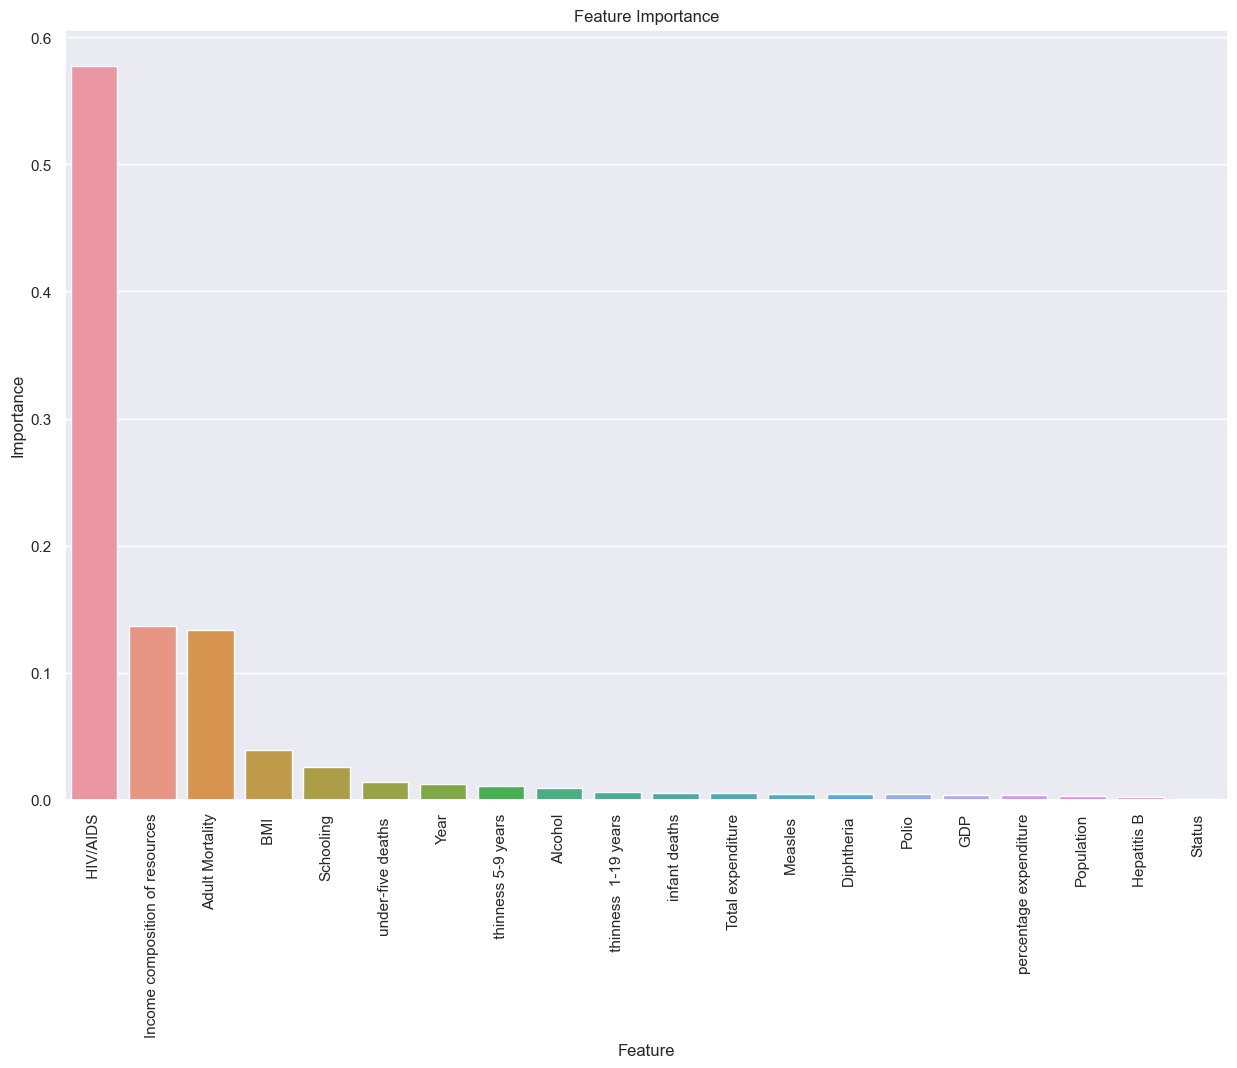

In [169]:
#create dataframe of feature importances and plot the features
feature_imp = pd.DataFrame(rf1.feature_importances_,index=X_train_trans_final.columns).sort_values(by=0,ascending=False).reset_index().rename(columns={'index':'Feature',0:'Importance'})

plt.figure(figsize=(15,10))
sns.barplot(feature_imp,x = 'Feature',y = 'Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance')

In [170]:
#Hyperparameters Tuning (max_depth & n_estimators) - Iteration 1
param_grid = {
              'max_depth':[x for x in range(10,100,20)],
              'n_estimators':[x for x in range(100,1000,200)]
             }

rf_base = RandomForestRegressor(random_state=35)

gsearch1 = GridSearchCV(estimator= rf_base,
                        param_grid=param_grid,n_jobs=-1,
                        scoring='neg_root_mean_squared_error',
                        cv=5)

%time gsearch1.fit(X_train_trans_final,y_train)

CPU times: total: 6.95 s
Wall time: 3min 53s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=35), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70, 90],
                         'n_estimators': [100, 300, 500, 700, 900]},
             scoring='neg_root_mean_squared_error')

In [171]:
gsearch1.cv_results_

{'mean_fit_time': array([ 1.8256762 ,  5.10109062,  8.44706845, 12.12634568, 17.38442059,
         2.63830247,  7.94822922, 13.53938956, 19.11558027, 25.15121899,
         2.80021725,  8.5745883 , 14.13205748, 19.94807549, 25.98139992,
         2.88671374,  8.74780898, 14.8555707 , 20.80687265, 26.99254193,
         2.97630172,  9.00268111, 15.40925555, 21.60664325, 26.76329145]),
 'std_fit_time': array([0.04718035, 0.12517817, 0.14357234, 0.35729152, 0.4348322 ,
        0.04134396, 0.03969973, 0.09985963, 0.31430646, 0.18439011,
        0.10585682, 0.13659321, 0.15547274, 0.2279589 , 0.22225688,
        0.03575397, 0.07771037, 0.11532189, 0.25073684, 0.31864355,
        0.02086597, 0.21579983, 0.09929051, 0.65648717, 1.77624455]),
 'mean_score_time': array([0.02057333, 0.04690485, 0.07136607, 0.12054462, 0.15068421,
        0.02034273, 0.05631318, 0.09480228, 0.1334332 , 0.20040956,
        0.02554049, 0.06807203, 0.10347776, 0.1478014 , 0.19549656,
        0.0213213 , 0.06238546, 0.1

In [172]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 30, 'n_estimators': 300}, -2.0367131480559744)

In [173]:
#Hyperparameters Tuning (max_depth & n_estimators) - Iteration 2

param_grid2 = {
              'max_depth':[20,25,30,35,40],
              'n_estimators':[200,250,300,350,400]
             }

rf_base = RandomForestRegressor(random_state=35)

gsearch2 = GridSearchCV(estimator= rf_base,
                        param_grid=param_grid2,n_jobs=-1,
                        scoring='neg_root_mean_squared_error',
                        cv=5)

%time gsearch2.fit(X_train_trans_final,y_train)

CPU times: total: 8.2 s
Wall time: 2min 15s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=35), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35, 40],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='neg_root_mean_squared_error')

In [174]:
gsearch2.cv_results_

{'mean_fit_time': array([ 4.70981154,  5.70902905,  6.63792162,  8.12470002,  9.86612511,
         5.17302442,  6.46635618,  7.9337749 ,  9.20295415, 10.42474861,
         5.21120329,  6.60153513,  7.87388372,  9.23249841, 10.72718086,
         5.32601781,  6.6540679 ,  8.00935049,  9.40546379, 10.64437366,
         5.37935162,  6.686064  ,  8.05698404,  9.59727321, 11.26607962]),
 'std_fit_time': array([0.06478749, 0.13575466, 0.03118792, 0.20895169, 0.30386048,
        0.08092824, 0.04690432, 0.06449869, 0.04644898, 0.08754852,
        0.0304193 , 0.02494509, 0.06646639, 0.06198337, 0.10357679,
        0.08673891, 0.05523376, 0.11376461, 0.1071178 , 0.08195033,
        0.03959648, 0.0546092 , 0.08058879, 0.25797925, 0.16873772]),
 'mean_score_time': array([0.03384094, 0.04202394, 0.05329418, 0.06320519, 0.07238755,
        0.04576726, 0.04820824, 0.06292663, 0.06305637, 0.0780952 ,
        0.04343815, 0.0464313 , 0.0602006 , 0.0729228 , 0.07897043,
        0.04305325, 0.05074973, 0.0

In [175]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 20, 'n_estimators': 300}, -2.0345548474841544)

In [176]:
#Hyperparameters Tuning (max_depth & n_estimators) - Iteration 3

param_grid3 = {
              'max_depth':range(15,25,2),
              'n_estimators':range(270,331,10)
             }

rf_base = RandomForestRegressor(random_state=35)

gsearch3 = GridSearchCV(estimator= rf_base,
                        param_grid=param_grid3,n_jobs=-1,
                        scoring='neg_root_mean_squared_error',
                        cv=5)

%time gsearch3.fit(X_train_trans_final,y_train)

CPU times: total: 7.45 s
Wall time: 1h 50min 31s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=35), n_jobs=-1,
             param_grid={'max_depth': range(15, 25, 2),
                         'n_estimators': range(270, 331, 10)},
             scoring='neg_root_mean_squared_error')

In [177]:
gsearch3.best_params_, gsearch3.best_score_

({'max_depth': 21, 'n_estimators': 310}, -2.03440807973781)

In [178]:
#Get predictions
y_fit = gsearch3.best_estimator_.predict(X_train_trans_final)
y_pred = gsearch3.best_estimator_.predict(X_test_trans_final)

In [179]:
#Evaluate the Model
train_hypertuning_perf['RF2'] = get_eval_metrics(y_train,y_fit)
test_hypertuning_perf['RF2'] = get_eval_metrics(y_test,y_pred)

In [180]:
train_hypertuning_perf

RF1                  RF2  RF3  RF4
R2_score               0.9900               0.9900  NaN  NaN
RMSE                   0.7300               0.7300  NaN  NaN
MAE                    0.4600               0.4500  NaN  NaN
MAPE                   0.6900               0.6800  NaN  NaN

In [181]:
test_hypertuning_perf

RF1                  RF2  RF3  RF4
R2_score               0.9500               0.9500  NaN  NaN
RMSE                   2.0700               2.0800  NaN  NaN
MAE                    1.2900               1.2800  NaN  NaN
MAPE                   1.9900               1.9700  NaN  NaN

Text(0.5, 1.0, 'Feature Importance')

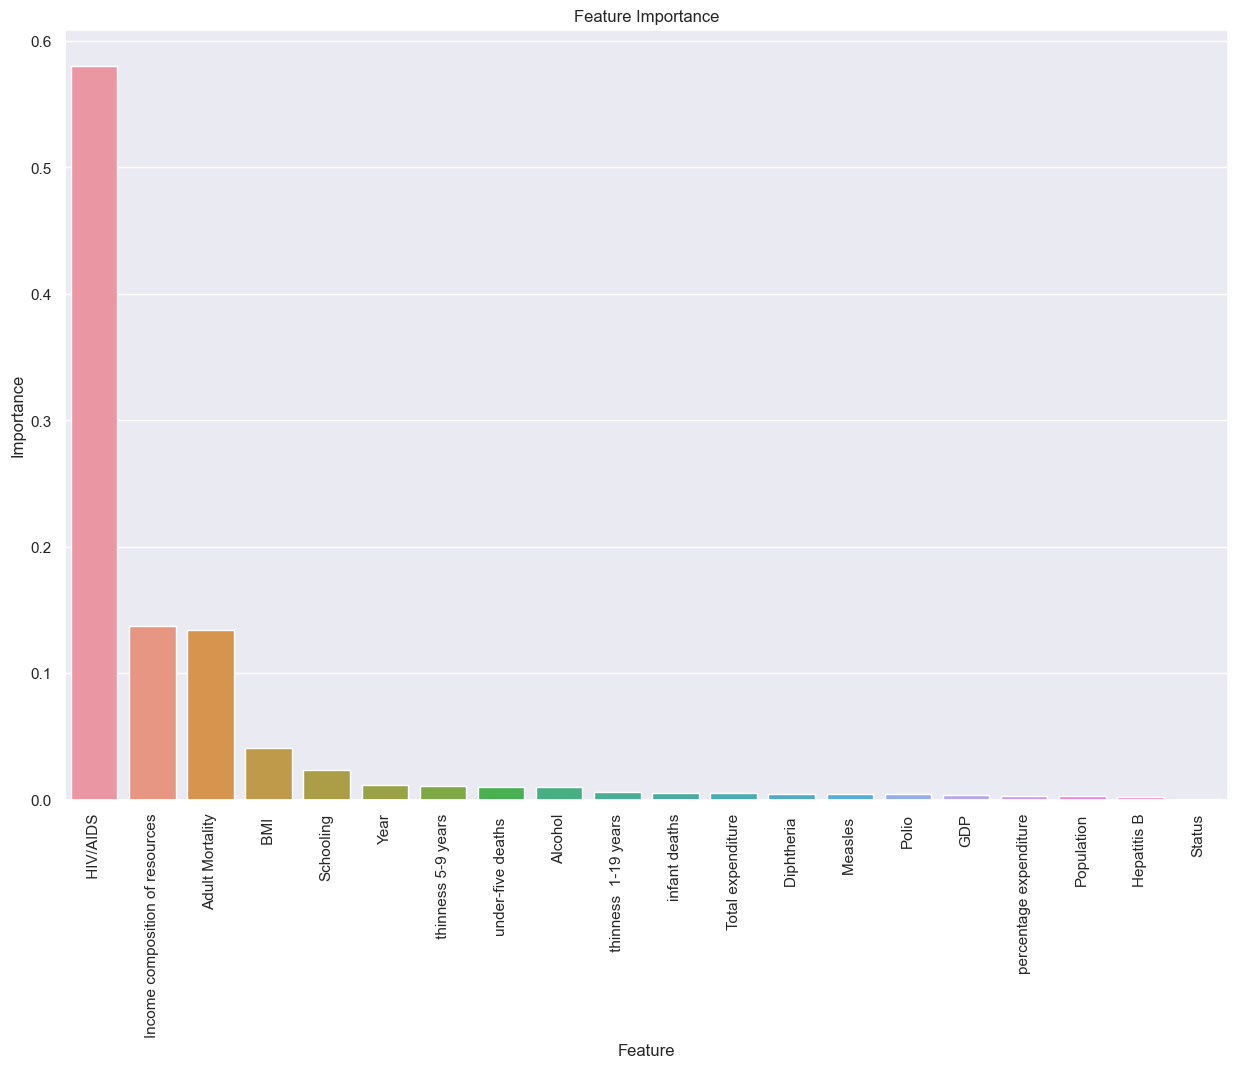

In [182]:
#create dataframe of feature importances and plot the features

feature_imp = pd.DataFrame(gsearch3.best_estimator_.feature_importances_,index=X_train_trans_final.columns).sort_values(by=0,ascending=False).reset_index().rename(columns={'index':'Feature',0:'Importance'})

plt.figure(figsize=(15,10))
sns.barplot(feature_imp,x = 'Feature',y = 'Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance')

In [183]:
#Hyperparameters Tuning (min_samples_split, min_samples_leaf, bootstrap,max_features) - Iteration 1

param_grid4 = {
               'min_samples_split': [2,10,100],
               'min_samples_leaf': [i for i in range(1,10,2)],
               'bootstrap': [True,False],
               'max_features' : ["sqrt", "log2", None]
             }

rf_base = RandomForestRegressor(n_estimators = 310, max_depth=21, random_state=35)

gsearch4 = GridSearchCV(estimator= rf_base,
                        param_grid=param_grid4,n_jobs=-1,
                        scoring='neg_root_mean_squared_error',
                        cv=5)

%time gsearch4.fit(X_train_trans_final,y_train)

CPU times: total: 5.53 s
Wall time: 2min 49s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=21, n_estimators=310,
                                             random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 10, 100]},
             scoring='neg_root_mean_squared_error')

In [184]:
gsearch4.best_params_, gsearch4.best_score_

({'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 -1.8964812924279197)

In [185]:
#Hyperparameters Tuning (min_samples_split, min_samples_leaf, bootstrap,max_features) - Iteration 2

param_grid5 = {
               'min_samples_split': [i for i in range(2,11)],
               'min_samples_leaf': [1,2,3],
               'bootstrap': [True,False],
               'max_features' : ["sqrt", "log2", None]
             }

rf_base = RandomForestRegressor(n_estimators = 310, max_depth=21, random_state=35)

gsearch5 = GridSearchCV(estimator= rf_base,
                        param_grid=param_grid5,
                        n_jobs=-1,
                        scoring='neg_root_mean_squared_error',
                        cv=5)

%time gsearch5.fit(X_train_trans_final,y_train)

CPU times: total: 6.03 s
Wall time: 6min 43s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=21, n_estimators=310,
                                             random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_root_mean_squared_error')

In [186]:
gsearch5.best_params_, gsearch5.best_score_

({'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 -1.8964812924279197)

In [187]:
#Get predictions
y_fit = gsearch5.best_estimator_.predict(X_train_trans_final)
y_pred = gsearch5.best_estimator_.predict(X_test_trans_final)

In [188]:
#Evaluate the Model
train_hypertuning_perf['RF3'] = get_eval_metrics(y_train,y_fit)
test_hypertuning_perf['RF3'] = get_eval_metrics(y_test,y_pred)

In [189]:
train_hypertuning_perf

RF1                  RF2                  RF3  RF4
R2_score               0.9900               0.9900               1.0000  NaN
RMSE                   0.7300               0.7300               0.0000  NaN
MAE                    0.4600               0.4500               0.0000  NaN
MAPE                   0.6900               0.6800               0.0000  NaN

In [190]:
test_hypertuning_perf

RF1                  RF2                  RF3  RF4
R2_score               0.9500               0.9500               0.9600  NaN
RMSE                   2.0700               2.0800               1.9800  NaN
MAE                    1.2900               1.2800               1.1600  NaN
MAPE                   1.9900               1.9700               1.8000  NaN

Text(0.5, 1.0, 'Feature Importance')

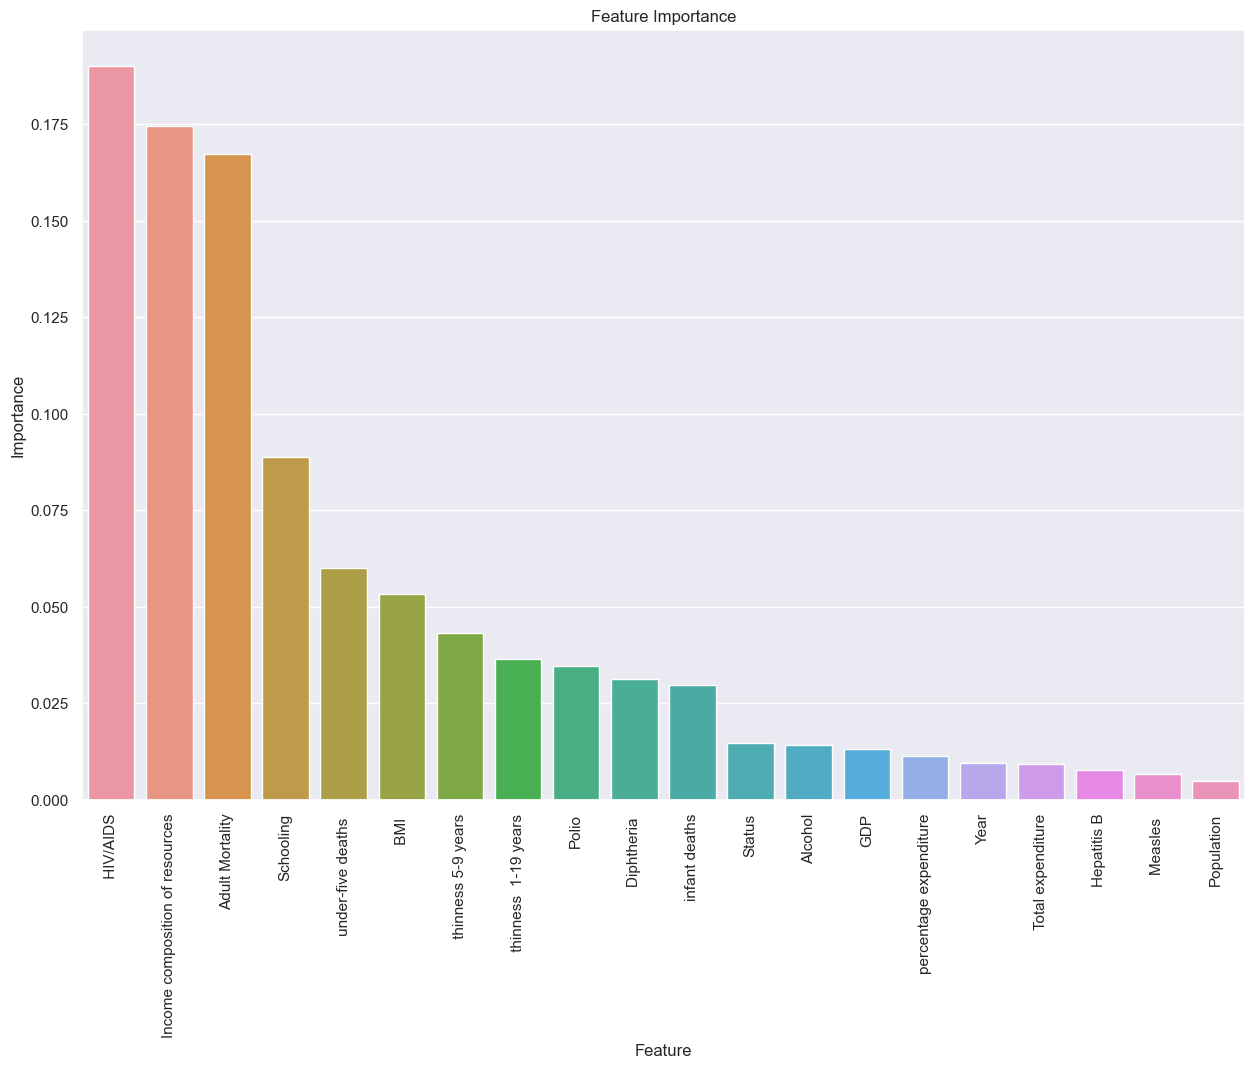

In [191]:
#create dataframe of feature importances and plot the features

feature_imp = pd.DataFrame(gsearch5.best_estimator_.feature_importances_,index=X_train_trans_final.columns).sort_values(by=0,ascending=False).reset_index().rename(columns={'index':'Feature',0:'Importance'})

plt.figure(figsize=(15,10))
sns.barplot(feature_imp,x = 'Feature',y = 'Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance')

In [192]:
#Remove features that don't have high feature importance
trim_features = feature_imp.loc[:10,"Feature"].tolist()
trim_features

[' HIV/AIDS',
 'Income composition of resources',
 'Adult Mortality',
 'Schooling',
 'under-five deaths ',
 ' BMI ',
 ' thinness 5-9 years',
 ' thinness  1-19 years',
 'Polio',
 'Diphtheria ',
 'infant deaths']

In [193]:
#Initialize the model with tuned hyperparameters and fit on training set

rf4 = RandomForestRegressor(n_estimators = 310, max_depth=21, bootstrap= False,
                            max_features= 'sqrt', min_samples_leaf=1,min_samples_split= 2,random_state=35)
rf4.fit(X_train_trans_final[trim_features],y_train)

RandomForestRegressor(bootstrap=False, max_depth=21, max_features='sqrt',
                      n_estimators=310, random_state=35)

In [194]:
#get predictions
y_fit = rf4.predict(X_train_trans_final[trim_features])
y_pred = rf4.predict(X_test_trans_final[trim_features])

In [195]:
#Evaluate the Model
train_hypertuning_perf['RF4'] = get_eval_metrics(y_train,y_fit)
test_hypertuning_perf['RF4'] = get_eval_metrics(y_test,y_pred)

In [196]:
train_hypertuning_perf

RF1                  RF2                  RF3  \
R2_score               0.9900               0.9900               1.0000   
RMSE                   0.7300               0.7300               0.0000   
MAE                    0.4600               0.4500               0.0000   
MAPE                   0.6900               0.6800               0.0000   

                          RF4  
R2_score               1.0000  
RMSE                   0.0100  
MAE                    0.0000  
MAPE                   0.0000

In [197]:
test_hypertuning_perf

RF1                  RF2                  RF3  \
R2_score               0.9500               0.9500               0.9600   
RMSE                   2.0700               2.0800               1.9800   
MAE                    1.2900               1.2800               1.1600   
MAPE                   1.9900               1.9700               1.8000   

                          RF4  
R2_score               0.9600  
RMSE                   1.9000  
MAE                    1.0800  
MAPE                   1.6700

Text(0.5, 1.0, 'Feature Importance')

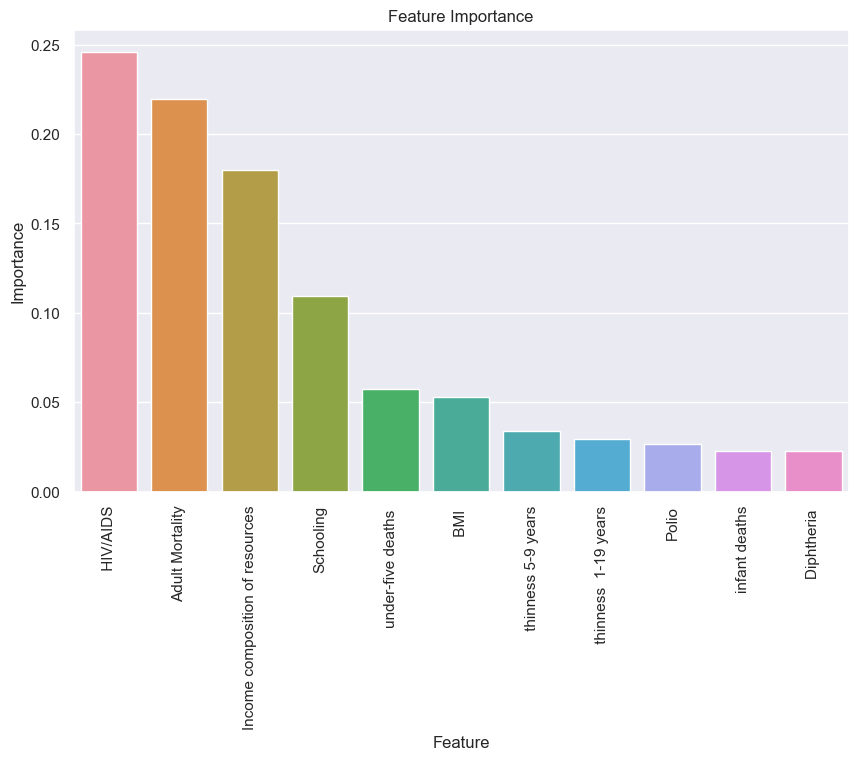

In [198]:
#create dataframe of feature importances and plot the features

feature_imp = pd.DataFrame(rf4.feature_importances_,index=trim_features).sort_values(by=0,ascending=False).reset_index().rename(columns={'index':'Feature',0:'Importance'})

plt.figure(figsize=(10,6))
sns.barplot(feature_imp,x = 'Feature',y = 'Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance')

## SHAP for Model Interpretability

### 1. Waterfall Plot

In [203]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf4)

In [204]:
#get shap values
shap_values = explainer(X_test_trans_final[trim_features])


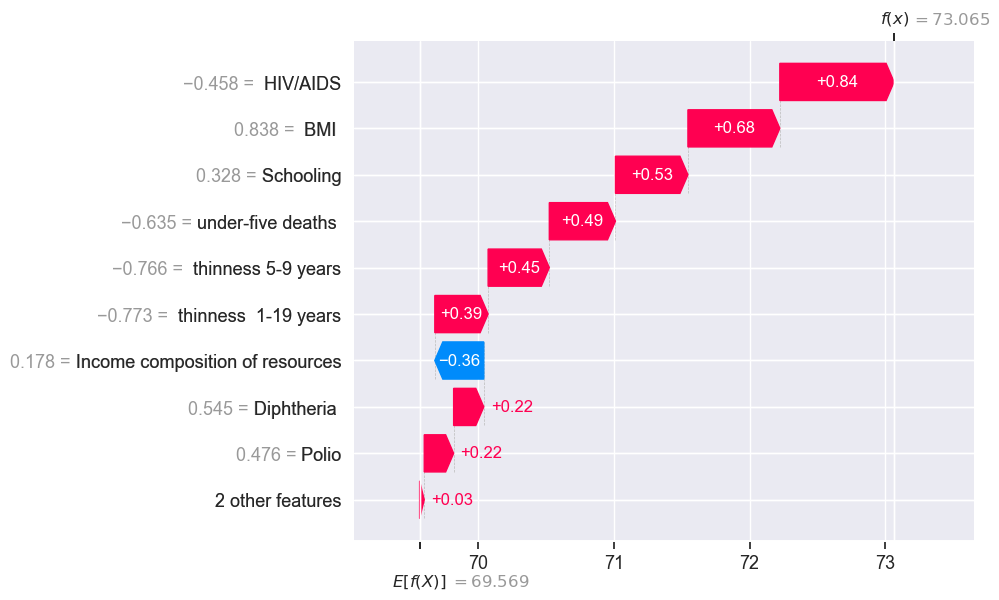

In [205]:
#Plot
idx = 14
# explanation = shap.Explanation(shap_values.values[:,:,1], shap_values.base_values[:,1], feature_names=X_test_final.columns, data = X_test_final.values)
shap.plots.waterfall(shap_values[idx])

### 2. Beeswarm Plot

<Axes: xlabel='SHAP value (impact on model output)'>

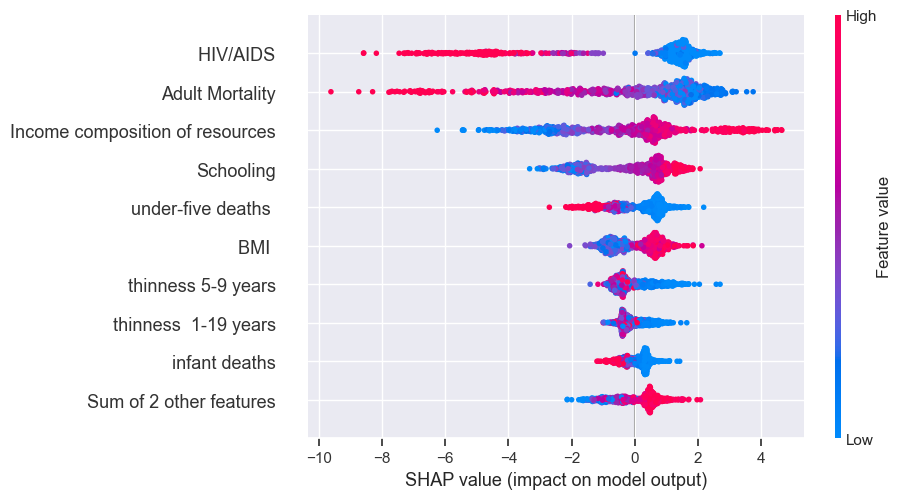

In [207]:
#display beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

### 3. Summary Plot

In [ ]:
shap_interaction = explainer.shap_interaction_values(X_test_trans_final[trim_features])

In [ ]:
#Display summary plot
shap.summary_plot(shap_interaction, X_test_trans_final[trim_features], show=False)